# Init

In [1]:
!pip install session_info

In [2]:
import session_info
session_info.show()

In [3]:
# !pip install transformers
# !pip install torch
# !pip install sentencepiece
!pip install emoji
!pip install sastrawi
!pip install wordcloud
!pip install plotly
# !pip install google_trans_new
!pip install googletrans==3.1.0a0

In [4]:
!pip install tensorflow
# !pip install xlsxwriter
!pip install Sastrawi

In [5]:
!pip install torch torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [6]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import torch
import emoji
from googletrans import Translator
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Exploratory Data Analysis (EDA)

In [7]:
df_raw_p = pd.read_excel("curr_train.xlsx",'Patrick')
df_raw_v = pd.read_excel("curr_train.xlsx",'Vito')
df_raw_f = pd.read_excel("curr_train.xlsx",'Farel')
df_mod_mega = pd.read_excel("df_sentiment_modified.xlsx",'mega')
df_mod_btpn = pd.read_excel("df_sentiment_modified.xlsx",'btpn')
df_mod_btn = pd.read_excel("df_sentiment_modified.xlsx",'btn')
df_all = pd.read_excel("df_all.xlsx",'Sheet1')

In [8]:
print(len(df_raw_p))
print(len(df_raw_v))
print(len(df_raw_f))
print(len(df_mod_mega))
print(len(df_mod_btpn))
print(len(df_mod_btn))
print(len(df_all))

20000
20000
18979
4654
9359
5996
19777


In [9]:
df_all.head()

,Unnamed: 0,created_at,id,username,location,friends_count,followers_count,text,retweet_count,favorite_count,place,category,sentiment_ori,sentiment_mod
0,0,2021-04-15 06:08:14+00:00,1382576478068515072,jesicaprilliana,"East Java, Indonesia",577,667,@JeniusConnect @VOYEJ Aku sih langsung top up ...,0,0,NaN,bank btpn,1,2
1,1,2021-09-20 09:14:32+00:00,1439880646088815104,JeniusConnect,NaN,78,82251,"@dheeamalia Baik, Dede. Mohon maaf atas ketida...",0,0,NaN,bank btpn,99,99
2,3,2021-12-06 04:30:55+00:00,1467713139290811904,JeniusConnect,NaN,78,82251,"@Tiacid Hi, Tia. Pertanyaan kamu sudah kami ba...",0,1,NaN,bank btpn,99,99
3,4,2021-10-12 08:11:03+00:00,1447837202222752000,muwiosigu,9xliner,96,89,@CaratShopINA 100.600 bca btpn dana spay,0,0,NaN,bank btpn,99,99
4,5,2021-05-03 13:34:09+00:00,1389211680156971008,hahihahihaaaaaa,Indonesia,1000,645,"@JeniusConnect Dari dulu emang gapernah mudik,...",0,0,NaN,bank btpn,1,2


In [10]:
df_mod_mega.head()

,user,text,sentiment,sentiment_mod
0,Reivolusi,Kenapa sulit banget Nelpon Call Center kartu k...,-1,0
1,muh_andiafif,@BankMegaID yang terhormat ibu aerin di bankme...,-1,0
2,Promo_Banten,@BankMegaID Silahkan tanya yg brsngktn yg meng...,-1,0
3,radar_malang,Eks Bank Mega Malang Terancam Hadapi Tuntutan ...,-1,0
4,BacaDiBaBe,"Deposito Rp 65 M di Bank Mega Raib, Nasabah Ce...",-1,0


In [11]:
df_mod_mega['bank'] = 'Bank Mega'
df_mod_btpn['bank'] = 'BTPN'
df_mod_btn['bank'] = 'BTN'

In [12]:
df_raw_p.head()

,no,comments,bank,date,platform,"Label (1,0,-1)"
0,1,Keren banget Transmart 🤩🤩🤩,Bank Mega,2023-05-07,Instagram,1
1,2,gapernah di kabarin apply cc,Bank Mega,2023-05-07,Instagram,-1
2,3,Keren bht,Bank Mega,2023-05-07,Instagram,1
3,4,Transmart di makssar masih kurang lengkap bara...,Bank Mega,2023-05-07,Instagram,-1
4,5,@bankmegaid & Transmart keren Oke 😍,Bank Mega,2023-05-07,Instagram,1


In [13]:
df_raw_p.shape

(20000, 6)

In [14]:
df_raw_p['Label (1,0,-1)'].unique()

array([1, -1, 0, 99, nan, 9, 11, -11, '-'], dtype=object)

In [15]:
df_raw_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   no              20000 non-null  int64         
 1   comments        20000 non-null  object        
 2   bank            20000 non-null  object        
 3   date            20000 non-null  datetime64[ns]
 4   platform        20000 non-null  object        
 5   Label (1,0,-1)  19995 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 937.6+ KB


In [16]:
df_raw_p.describe()

,no
count,20000.000000
mean,10000.500000
std,5773.647028
min,1.000000
25%,5000.750000
50%,10000.500000
75%,15000.250000
max,20000.000000


In [17]:
df_raw_v.head()

,no,comments,bank,date,platform,"Label (1,0,-1)"
0,20001,masih maintenance ini min....tolong di percepa...,BCA,2023-05-14,Facebook,-1.0
1,20002,Eror terus gak tau orang mau depo apa ??,BCA,2023-05-14,Facebook,-1.0
2,20003,Ko lama ya erornya,BCA,2023-05-14,Facebook,-1.0
3,20004,Info M bengking apa sedang gangguan,BCA,2023-05-14,Facebook,-1.0
4,20005,Ini maintenance sampai jam brpa udh lebih,BCA,2023-05-14,Facebook,-1.0


In [18]:
df_raw_v.shape

(20000, 6)

In [19]:
df_raw_v['Label (1,0,-1)'].unique()

array([-1.,  0.,  1., nan, 11.])

In [20]:
df_raw_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   no              20000 non-null  int64         
 1   comments        20000 non-null  object        
 2   bank            20000 non-null  object        
 3   date            20000 non-null  datetime64[ns]
 4   platform        20000 non-null  object        
 5   Label (1,0,-1)  6634 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 937.6+ KB


In [21]:
df_raw_v.describe()

,no,"Label (1,0,-1)"
count,20000.000000,6634.000000
mean,30000.500000,0.917244
std,5773.647028,0.425617
min,20001.000000,-1.000000
25%,25000.750000,1.000000
50%,30000.500000,1.000000
75%,35000.250000,1.000000
max,40000.000000,11.000000


In [22]:
df_raw_f.head()

,no,comments,bank,date,platform,"Label (1,0,-1)"
0,40001,Min kalau limit transfer Virtual Acoount BCA x...,BCA,2023-05-16,Instagram,0.0
1,40002,Duh gasabar war besok,BCA,2023-05-16,Instagram,1.0
2,40003,Wajib dapet,BCA,2023-05-16,Instagram,1.0
3,40004,Min @goodlifebca klo nanti mau payment pake vi...,BCA,2023-05-16,Instagram,0.0
4,40005,Batas waktu pembayaran tiket berapa lama min? ...,BCA,2023-05-16,Instagram,0.0


In [23]:
df_raw_f.shape

(18979, 6)

In [24]:
df_raw_f['Label (1,0,-1)'].unique()

array([ 0.,  1., -1., 11., nan])

In [25]:
df_raw_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   no              18979 non-null  int64         
 1   comments        18979 non-null  object        
 2   bank            18979 non-null  object        
 3   date            18979 non-null  datetime64[ns]
 4   platform        18979 non-null  object        
 5   Label (1,0,-1)  7809 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 889.8+ KB


In [26]:
df_raw_f.describe()

,no,"Label (1,0,-1)"
count,18979.000000,7809.000000
mean,49490.000000,0.669740
std,5478.909715,0.583813
min,40001.000000,-1.000000
25%,44745.500000,0.000000
50%,49490.000000,1.000000
75%,54234.500000,1.000000
max,58979.000000,11.000000


# Handle Missing Value

In [27]:
df_raw_p = df_raw_p[df_raw_p['Label (1,0,-1)'].notna()]
df_raw_p = df_raw_p[df_raw_p['comments'].notna()]
df_raw_p

,no,comments,bank,date,platform,"Label (1,0,-1)"
0,1,Keren banget Transmart 🤩🤩🤩,Bank Mega,2023-05-07,Instagram,1
1,2,gapernah di kabarin apply cc,Bank Mega,2023-05-07,Instagram,-1
2,3,Keren bht,Bank Mega,2023-05-07,Instagram,1
3,4,Transmart di makssar masih kurang lengkap bara...,Bank Mega,2023-05-07,Instagram,-1
4,5,@bankmegaid & Transmart keren Oke 😍,Bank Mega,2023-05-07,Instagram,1
...,...,...,...,...,...,...
19995,19996,Eror mulu bca,BCA,2023-05-14,Facebook,-1
19996,19997,Error terus ini BCA,BCA,2023-05-14,Facebook,-1
19997,19998,gangguan terus,BCA,2023-05-14,Facebook,-1
19998,19999,Udah jam 5 lewat woyy masih aja mt,BCA,2023-05-14,Facebook,-1


In [28]:
df_raw_v = df_raw_v[df_raw_v['Label (1,0,-1)'].notna()]
df_raw_v = df_raw_v[df_raw_v['comments'].notna()]
df_raw_v

,no,comments,bank,date,platform,"Label (1,0,-1)"
0,20001,masih maintenance ini min....tolong di percepa...,BCA,2023-05-14,Facebook,-1.0
1,20002,Eror terus gak tau orang mau depo apa ??,BCA,2023-05-14,Facebook,-1.0
2,20003,Ko lama ya erornya,BCA,2023-05-14,Facebook,-1.0
3,20004,Info M bengking apa sedang gangguan,BCA,2023-05-14,Facebook,-1.0
4,20005,Ini maintenance sampai jam brpa udh lebih,BCA,2023-05-14,Facebook,-1.0
...,...,...,...,...,...,...
19793,39794,BCA KOCAK 😍😍 MAKASIH BANYAK YA BCA 😍❤️🙌,BCA,2023-05-17,Instagram,1.0
19797,39798,Temen2 disini yg mungkin alhamdullilah sudah m...,BCA,2023-05-17,Instagram,1.0
19805,39806,"yuk yg udh dapet tiket, ke lykke ambil minuman...",BCA,2023-05-17,Instagram,1.0
19944,39945,Mw nonton kah sim @asimaelvinda29??😍,BCA,2023-05-17,Instagram,1.0


In [29]:
df_raw_f = df_raw_f[df_raw_f['Label (1,0,-1)'].notna()]
df_raw_f = df_raw_f[df_raw_f['comments'].notna()]
df_raw_f

,no,comments,bank,date,platform,"Label (1,0,-1)"
0,40001,Min kalau limit transfer Virtual Acoount BCA x...,BCA,2023-05-16,Instagram,0.0
1,40002,Duh gasabar war besok,BCA,2023-05-16,Instagram,1.0
2,40003,Wajib dapet,BCA,2023-05-16,Instagram,1.0
3,40004,Min @goodlifebca klo nanti mau payment pake vi...,BCA,2023-05-16,Instagram,0.0
4,40005,Batas waktu pembayaran tiket berapa lama min? ...,BCA,2023-05-16,Instagram,0.0
...,...,...,...,...,...,...
7805,47806,Berkecukupan dlm segala hal...,Bank Mega,2023-05-28,Facebook,0.0
7806,47807,Bebas hutang tenang dlm ibadah,Bank Mega,2023-05-28,Facebook,0.0
7807,47808,Sehat & punya 5 istri,Bank Mega,2023-05-28,Facebook,0.0
7808,47809,Masih hidup.,Bank Mega,2023-05-28,Facebook,0.0


In [30]:
df_mod_mega.rename(columns={'text': 'comments','sentiment':'Label (1,0,-1)'}, inplace=True)
df_mod_btpn.rename(columns={'text': 'comments','sentiment':'Label (1,0,-1)'}, inplace=True)
df_mod_btn.rename(columns={'text': 'comments','sentiment':'Label (1,0,-1)'}, inplace=True)
df_all.rename(columns={'text': 'comments','sentiment_ori':'Label (1,0,-1)','category':'bank','username':'user'}, inplace=True)

In [31]:
df_mod_mega = df_mod_mega[df_mod_mega['Label (1,0,-1)'].notna()]
df_mod_mega = df_mod_mega[df_mod_mega['comments'].notna()]
df_mod_mega

,user,comments,"Label (1,0,-1)",sentiment_mod,bank
0,Reivolusi,Kenapa sulit banget Nelpon Call Center kartu k...,-1,0,Bank Mega
1,muh_andiafif,@BankMegaID yang terhormat ibu aerin di bankme...,-1,0,Bank Mega
2,Promo_Banten,@BankMegaID Silahkan tanya yg brsngktn yg meng...,-1,0,Bank Mega
3,radar_malang,Eks Bank Mega Malang Terancam Hadapi Tuntutan ...,-1,0,Bank Mega
4,BacaDiBaBe,"Deposito Rp 65 M di Bank Mega Raib, Nasabah Ce...",-1,0,Bank Mega
...,...,...,...,...,...
4649,idnpos_com,"Bak Ketiban Durian Runtuh, Para Pemegang Saham...",99,99,Bank Mega
4650,MNCSekuritas,RUPST Bank Mega menetapkan seluruh laba bersih...,99,99,Bank Mega
4651,LAZISMU_PKU,RESPON MUHAMMADIYAH\nSIAGA BENCANA INDONESIA 2...,99,99,Bank Mega
4652,lokerbankbumn_,Lowongan Kerja Bank Mega Februari 2021\n#loker...,99,99,Bank Mega


In [32]:
df_mod_btpn = df_mod_btpn[df_mod_btpn['Label (1,0,-1)'].notna()]
df_mod_btpn = df_mod_btpn[df_mod_btpn['comments'].notna()]
df_mod_btpn

,user,comments,"Label (1,0,-1)",sentiment_mod,bank
0,bingunggalau,@JeniusConnect @agungluo Terus uangnya ilang g...,-1,0,BTPN
1,chanthegenius,"@JeniusConnect kak admin mau tanya, katanya ka...",-1,0,BTPN
2,Gayatriay,@JeniusConnect Kalau telpon bisa solve problem...,-1,0,BTPN
3,HssnaaJ,@afuri_ @jeniushelp @JeniusConnect Apalagi kal...,-1,0,BTPN
4,Jolanggg,laporan pengaduan diinvestigasi hampir sebulan...,-1,0,BTPN
...,...,...,...,...,...
9354,jxedin,@cursedkidd LO KIRA BTPN SYARIAH???!!!,99,99,BTPN
9355,karirfess,"kr! aku gak bosen ngingetin, buat kalian yg mu...",99,99,BTPN
9356,ireneisbaebae,Hey kalau ada yang mau download JENIUS masukka...,99,99,BTPN
9357,yewrfavscent,@worksfess Kalo untuk jobdesc nya sih memang a...,99,99,BTPN


In [33]:
df_mod_btn = df_mod_btn[df_mod_btn['Label (1,0,-1)'].notna()]
df_mod_btn = df_mod_btn[df_mod_btn['comments'].notna()]
df_mod_btn

,user,comments,"Label (1,0,-1)",sentiment_mod,bank
0,berlianssss,"@bankbtn Dari sinarmas katanya min, dan hebatn...",-1,0,BTN
1,SriKant14255262,@BPJSTKinfo @cayad507 Tapi kenapa saya tanya b...,-1,0,BTN
2,PrinceSeungHae,@bankbtn @hali_wahyudi [ikut nimbrung] udah ta...,-1,0,BTN
3,bachtiarz99,@bankbtn Siang tadi saya top up link aja lewat...,-1,0,BTN
4,BoetMas,@bankbtn Kenapa sertifikat rmh saya blm disera...,-1,0,BTN
...,...,...,...,...,...
5991,PermataBank,@mymieza @slaverion @just_iema @hanmula @dwiha...,99,99,BTN
5992,bankbtn_syariah,Untuk info lebih lanjut kunjungi https://t.co/...,99,99,BTN
5993,bank_indonesia,@septiadisaput19 @bankbtn @bankbtncare Selengk...,99,99,BTN
5994,bankbtn_syariah,"Sahabat BTN Syariah, \n\nPada Senin, 14 Februa...",99,99,BTN


In [34]:
df_all = df_all[df_all['Label (1,0,-1)'].notna()]
df_all = df_all[df_all['comments'].notna()]
df_all

,Unnamed: 0,created_at,id,user,location,friends_count,followers_count,comments,retweet_count,favorite_count,place,bank,"Label (1,0,-1)",sentiment_mod
0,0,2021-04-15 06:08:14+00:00,1382576478068515072,jesicaprilliana,"East Java, Indonesia",577,667,@JeniusConnect @VOYEJ Aku sih langsung top up ...,0,0,NaN,bank btpn,1,2
1,1,2021-09-20 09:14:32+00:00,1439880646088815104,JeniusConnect,NaN,78,82251,"@dheeamalia Baik, Dede. Mohon maaf atas ketida...",0,0,NaN,bank btpn,99,99
2,3,2021-12-06 04:30:55+00:00,1467713139290811904,JeniusConnect,NaN,78,82251,"@Tiacid Hi, Tia. Pertanyaan kamu sudah kami ba...",0,1,NaN,bank btpn,99,99
3,4,2021-10-12 08:11:03+00:00,1447837202222752000,muwiosigu,9xliner,96,89,@CaratShopINA 100.600 bca btpn dana spay,0,0,NaN,bank btpn,99,99
4,5,2021-05-03 13:34:09+00:00,1389211680156971008,hahihahihaaaaaa,Indonesia,1000,645,"@JeniusConnect Dari dulu emang gapernah mudik,...",0,0,NaN,bank btpn,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19772,495,2022-05-26 10:34:52,1529773053294566912,detikfinance,"Jakarta, Indonesia",16,629383,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,1,2,NaN,bank btn,0,1
19773,496,2022-02-15 13:35:14,1493579657433666048,galih03025824,"Tegal, Jawa Tengah",1958,1380,@bankbtn semoga makin sekses dan jaya bisa mem...,0,0,NaN,bank btn,1,2
19774,497,2022-01-16 11:01:22,1482669299118797056,sookoonea,she/her,1600,1207,"@bankbtn minnn, cek dm saya yaaa...",0,0,NaN,bank btn,0,1
19775,498,2022-02-17 14:37:34,1494320122441309952,xtrada_2004,"Bandung, Indonesia",3125,638,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,0,1,NaN,bank btn,0,1


## Drop unused column

In [35]:
df_raw_p = df_raw_p.drop(['no','date'], axis=1)
df_raw_v = df_raw_v.drop(['no','date'], axis=1)
df_raw_f = df_raw_f.drop(['no','date'], axis=1)
df_mod_mega = df_mod_mega.drop(['user','sentiment_mod'], axis=1)
df_mod_btpn = df_mod_btpn.drop(['user','sentiment_mod'], axis=1)
df_mod_btn = df_mod_btn.drop(['user','sentiment_mod'], axis=1)
df_all = df_all[['comments','Label (1,0,-1)','bank']]

Data yang tidak memiliki platform akan diasumsikan diambil melalui Instagram

In [36]:
df_all['platform'] = 'Instagram'
df_mod_mega['platform'] = 'Instagram'
df_mod_btpn['platform'] = 'Instagram'
df_mod_btn['platform'] = 'Instagram'

<ipython-input-36-684edf6a26cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['platform'] = 'Instagram'


In [37]:
df_all

,comments,"Label (1,0,-1)",bank,platform
0,@JeniusConnect @VOYEJ Aku sih langsung top up ...,1,bank btpn,Instagram
1,"@dheeamalia Baik, Dede. Mohon maaf atas ketida...",99,bank btpn,Instagram
2,"@Tiacid Hi, Tia. Pertanyaan kamu sudah kami ba...",99,bank btpn,Instagram
3,@CaratShopINA 100.600 bca btpn dana spay,99,bank btpn,Instagram
4,"@JeniusConnect Dari dulu emang gapernah mudik,...",1,bank btpn,Instagram
...,...,...,...,...
19772,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,0,bank btn,Instagram
19773,@bankbtn semoga makin sekses dan jaya bisa mem...,1,bank btn,Instagram
19774,"@bankbtn minnn, cek dm saya yaaa...",0,bank btn,Instagram
19775,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,0,bank btn,Instagram


In [38]:
df_raw_f

,comments,bank,platform,"Label (1,0,-1)"
0,Min kalau limit transfer Virtual Acoount BCA x...,BCA,Instagram,0.0
1,Duh gasabar war besok,BCA,Instagram,1.0
2,Wajib dapet,BCA,Instagram,1.0
3,Min @goodlifebca klo nanti mau payment pake vi...,BCA,Instagram,0.0
4,Batas waktu pembayaran tiket berapa lama min? ...,BCA,Instagram,0.0
...,...,...,...,...
7805,Berkecukupan dlm segala hal...,Bank Mega,Facebook,0.0
7806,Bebas hutang tenang dlm ibadah,Bank Mega,Facebook,0.0
7807,Sehat & punya 5 istri,Bank Mega,Facebook,0.0
7808,Masih hidup.,Bank Mega,Facebook,0.0


In [39]:
df_raw_p

,comments,bank,platform,"Label (1,0,-1)"
0,Keren banget Transmart 🤩🤩🤩,Bank Mega,Instagram,1
1,gapernah di kabarin apply cc,Bank Mega,Instagram,-1
2,Keren bht,Bank Mega,Instagram,1
3,Transmart di makssar masih kurang lengkap bara...,Bank Mega,Instagram,-1
4,@bankmegaid & Transmart keren Oke 😍,Bank Mega,Instagram,1
...,...,...,...,...
19995,Eror mulu bca,BCA,Facebook,-1
19996,Error terus ini BCA,BCA,Facebook,-1
19997,gangguan terus,BCA,Facebook,-1
19998,Udah jam 5 lewat woyy masih aja mt,BCA,Facebook,-1


## Combine Dataframe

In [40]:
df_raw = pd.concat([df_raw_p,df_raw_v,df_raw_f,df_mod_mega,df_mod_btpn,df_mod_btn,df_all])
df_raw

,comments,bank,platform,"Label (1,0,-1)"
0,Keren banget Transmart 🤩🤩🤩,Bank Mega,Instagram,1
1,gapernah di kabarin apply cc,Bank Mega,Instagram,-1
2,Keren bht,Bank Mega,Instagram,1
3,Transmart di makssar masih kurang lengkap bara...,Bank Mega,Instagram,-1
4,@bankmegaid & Transmart keren Oke 😍,Bank Mega,Instagram,1
...,...,...,...,...
19772,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,bank btn,Instagram,0
19773,@bankbtn semoga makin sekses dan jaya bisa mem...,bank btn,Instagram,1
19774,"@bankbtn minnn, cek dm saya yaaa...",bank btn,Instagram,0
19775,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,bank btn,Instagram,0


## Change unwanted value

In [41]:
df_raw['Label (1,0,-1)'].unique()

array([1, -1, 0, 99, 9, 11, -11, '-'], dtype=object)

In [42]:
df_raw.loc[df_raw['Label (1,0,-1)'] == 9, 'Label (1,0,-1)'] = 99 #ubah typo 9 menjadi 99
df_raw.loc[df_raw['Label (1,0,-1)'] == 11, 'Label (1,0,-1)'] = 1 #ubah typo 11 menjadi 1
df_raw.loc[df_raw['Label (1,0,-1)'] == -11, 'Label (1,0,-1)'] = -1 #ubah typo -11 menjadi -1
df_raw.loc[df_raw['Label (1,0,-1)'] == '-', 'Label (1,0,-1)'] = -1 #ubah typo - menjadi -1

In [43]:
df_raw['Label (1,0,-1)'].unique()

array([1, -1, 0, 99], dtype=object)

Label sudah sesuai yang diinginkan dimana 1 adalah komentar positif, 0 netral, -1 negatif, dan 99 sebagai data yang duplikat. Maka selanjutnya data dengan label 99 akan dihapus

## Erase data with 99 label

In [44]:
df_raw = df_raw[df_raw['Label (1,0,-1)'] != 99]

In [45]:
df_raw['Label (1,0,-1)'].unique()

array([1, -1, 0], dtype=object)

In [46]:
df_raw

,comments,bank,platform,"Label (1,0,-1)"
0,Keren banget Transmart 🤩🤩🤩,Bank Mega,Instagram,1
1,gapernah di kabarin apply cc,Bank Mega,Instagram,-1
2,Keren bht,Bank Mega,Instagram,1
3,Transmart di makssar masih kurang lengkap bara...,Bank Mega,Instagram,-1
4,@bankmegaid & Transmart keren Oke 😍,Bank Mega,Instagram,1
...,...,...,...,...
19772,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,bank btn,Instagram,0
19773,@bankbtn semoga makin sekses dan jaya bisa mem...,bank btn,Instagram,1
19774,"@bankbtn minnn, cek dm saya yaaa...",bank btn,Instagram,0
19775,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,bank btn,Instagram,0


Setelah data dengan label 99 dibersihkan, jumlah data menjadi 55057 baris

# Change Data Type

In [47]:
df_raw['comments'] = df_raw['comments'].astype(str)
df_raw['bank'] = df_raw['bank'].astype(str)
df_raw['platform'] = df_raw['platform'].astype(str)
df_raw['Label (1,0,-1)'] = df_raw['Label (1,0,-1)'].astype(int)

<ipython-input-47-7c8442822e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['comments'] = df_raw['comments'].astype(str)
<ipython-input-47-7c8442822e5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['bank'] = df_raw['bank'].astype(str)
<ipython-input-47-7c8442822e5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

## Format Bank Name

In [48]:
df_raw['bank'].unique()

array(['Bank Mega', 'Allo Bank', 'Neo Bank', 'BRI', 'BCA', 'BTPN', 'BTN',
       'bank btpn', 'bank mega', 'bank btn'], dtype=object)

In [49]:
df_raw.loc[df_raw['bank'] == 'bank mega', 'bank'] = 'Bank Mega'
df_raw.loc[df_raw['bank'] == 'mega', 'bank'] = 'Bank Mega'
df_raw.loc[df_raw['bank'] == 'btpn', 'bank'] = 'Bank BTPN'
df_raw.loc[df_raw['bank'] == 'bank btpn', 'bank'] = 'Bank BTPN'
df_raw.loc[df_raw['bank'] == 'btn', 'bank'] = 'Bank BTN'
df_raw.loc[df_raw['bank'] == 'bank btn', 'bank'] = 'Bank BTN'
df_raw.loc[df_raw['bank'] == 'BTN', 'bank'] = 'Bank BTN'
df_raw.loc[df_raw['bank'] == 'BTPN', 'bank'] = 'Bank BTPN'
df_raw.loc[df_raw['platform'] == 'facebook', 'platform'] = 'Facebook'

In [50]:
df_raw['bank'].unique()

array(['Bank Mega', 'Allo Bank', 'Neo Bank', 'BRI', 'BCA', 'Bank BTPN',
       'Bank BTN'], dtype=object)

In [51]:
df_raw.to_excel('df_raw.xlsx', index=False)


## Remove words with @

In [52]:
df_raw['text_cleaned'] = df_raw['comments'].str.replace(r'@\w+\b', '', regex=True)
df_raw

<ipython-input-52-109f16324697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['text_cleaned'] = df_raw['comments'].str.replace(r'@\w+\b', '', regex=True)


,comments,bank,platform,"Label (1,0,-1)",text_cleaned
0,Keren banget Transmart 🤩🤩🤩,Bank Mega,Instagram,1,Keren banget Transmart 🤩🤩🤩
1,gapernah di kabarin apply cc,Bank Mega,Instagram,-1,gapernah di kabarin apply cc
2,Keren bht,Bank Mega,Instagram,1,Keren bht
3,Transmart di makssar masih kurang lengkap bara...,Bank Mega,Instagram,-1,Transmart di makssar masih kurang lengkap bara...
4,@bankmegaid & Transmart keren Oke 😍,Bank Mega,Instagram,1,& Transmart keren Oke 😍
...,...,...,...,...,...
19772,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,Bank BTN,Instagram,0,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...
19773,@bankbtn semoga makin sekses dan jaya bisa mem...,Bank BTN,Instagram,1,semoga makin sekses dan jaya bisa memberi pel...
19774,"@bankbtn minnn, cek dm saya yaaa...",Bank BTN,Instagram,0,"minnn, cek dm saya yaaa..."
19775,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,Bank BTN,Instagram,0,1️⃣ 3 lantai impian\n2️⃣ Budget maksimal 100 ...


## Remove words with "#"

In [53]:
df_raw['text_cleaned'] = df_raw['text_cleaned'].str.replace(r'#\w+\b', '')
df_raw['text_cleaned']

<ipython-input-53-61aa67cd7572>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_raw['text_cleaned'] = df_raw['text_cleaned'].str.replace(r'#\w+\b', '')
<ipython-input-53-61aa67cd7572>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['text_cleaned'] = df_raw['text_cleaned'].str.replace(r'#\w+\b', '')


0                               Keren banget Transmart 🤩🤩🤩
1                             gapernah di kabarin apply cc
2                                                Keren bht
3        Transmart di makssar masih kurang lengkap bara...
4                                  & Transmart keren Oke 😍
                               ...                        
19772    PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...
19773     semoga makin sekses dan jaya bisa memberi pel...
19774                           minnn, cek dm saya yaaa...
19775     1️⃣ 3 lantai impian\n2️⃣ Budget maksimal 100 ...
19776     Semua kantor cabang bank BJB,BNI,BRI,BTN?? Do...
Name: text_cleaned, Length: 55057, dtype: object

## Remove words with "https"

In [54]:
df_raw['text_cleaned'] = df_raw['text_cleaned'].str.replace(r'https\S*', '')
df_raw

<ipython-input-54-08c923bdc9b6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_raw['text_cleaned'] = df_raw['text_cleaned'].str.replace(r'https\S*', '')
<ipython-input-54-08c923bdc9b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['text_cleaned'] = df_raw['text_cleaned'].str.replace(r'https\S*', '')


,comments,bank,platform,"Label (1,0,-1)",text_cleaned
0,Keren banget Transmart 🤩🤩🤩,Bank Mega,Instagram,1,Keren banget Transmart 🤩🤩🤩
1,gapernah di kabarin apply cc,Bank Mega,Instagram,-1,gapernah di kabarin apply cc
2,Keren bht,Bank Mega,Instagram,1,Keren bht
3,Transmart di makssar masih kurang lengkap bara...,Bank Mega,Instagram,-1,Transmart di makssar masih kurang lengkap bara...
4,@bankmegaid & Transmart keren Oke 😍,Bank Mega,Instagram,1,& Transmart keren Oke 😍
...,...,...,...,...,...
19772,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,Bank BTN,Instagram,0,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...
19773,@bankbtn semoga makin sekses dan jaya bisa mem...,Bank BTN,Instagram,1,semoga makin sekses dan jaya bisa memberi pel...
19774,"@bankbtn minnn, cek dm saya yaaa...",Bank BTN,Instagram,0,"minnn, cek dm saya yaaa..."
19775,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,Bank BTN,Instagram,0,1️⃣ 3 lantai impian\n2️⃣ Budget maksimal 100 ...


## Remove duplicates & empty comments

In [55]:
df_raw.drop_duplicates(inplace=True)
df_raw

<ipython-input-55-f0c4c2a67f35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop_duplicates(inplace=True)


,comments,bank,platform,"Label (1,0,-1)",text_cleaned
0,Keren banget Transmart 🤩🤩🤩,Bank Mega,Instagram,1,Keren banget Transmart 🤩🤩🤩
1,gapernah di kabarin apply cc,Bank Mega,Instagram,-1,gapernah di kabarin apply cc
2,Keren bht,Bank Mega,Instagram,1,Keren bht
3,Transmart di makssar masih kurang lengkap bara...,Bank Mega,Instagram,-1,Transmart di makssar masih kurang lengkap bara...
4,@bankmegaid & Transmart keren Oke 😍,Bank Mega,Instagram,1,& Transmart keren Oke 😍
...,...,...,...,...,...
19772,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,Bank BTN,Instagram,0,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...
19773,@bankbtn semoga makin sekses dan jaya bisa mem...,Bank BTN,Instagram,1,semoga makin sekses dan jaya bisa memberi pel...
19774,"@bankbtn minnn, cek dm saya yaaa...",Bank BTN,Instagram,0,"minnn, cek dm saya yaaa..."
19775,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,Bank BTN,Instagram,0,1️⃣ 3 lantai impian\n2️⃣ Budget maksimal 100 ...


In [56]:
df_raw = df_raw[df_raw['text_cleaned']!='']
df_raw

,comments,bank,platform,"Label (1,0,-1)",text_cleaned
0,Keren banget Transmart 🤩🤩🤩,Bank Mega,Instagram,1,Keren banget Transmart 🤩🤩🤩
1,gapernah di kabarin apply cc,Bank Mega,Instagram,-1,gapernah di kabarin apply cc
2,Keren bht,Bank Mega,Instagram,1,Keren bht
3,Transmart di makssar masih kurang lengkap bara...,Bank Mega,Instagram,-1,Transmart di makssar masih kurang lengkap bara...
4,@bankmegaid & Transmart keren Oke 😍,Bank Mega,Instagram,1,& Transmart keren Oke 😍
...,...,...,...,...,...
19772,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...,Bank BTN,Instagram,0,PT Bank Tabungan Negara Tbk (BTN) mencatatkan ...
19773,@bankbtn semoga makin sekses dan jaya bisa mem...,Bank BTN,Instagram,1,semoga makin sekses dan jaya bisa memberi pel...
19774,"@bankbtn minnn, cek dm saya yaaa...",Bank BTN,Instagram,0,"minnn, cek dm saya yaaa..."
19775,@bankbtn 1️⃣ 3 lantai impian\n2️⃣ Budget maksi...,Bank BTN,Instagram,0,1️⃣ 3 lantai impian\n2️⃣ Budget maksimal 100 ...


Setelah dilakukan pembersihan data duplikat dan data komentar yang kosong, jumlah data total menjadi 41726 baris

# Change Slang Data

In [2]:
slang_words_1 = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja",
                 "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo",
                 "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial",
                 "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam",
                 "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
                 "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "sangat", "banpol": "bantuan polisi",
                 "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan",
                 "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "kesal", "beud": "sangat", "bg": "abang",
                 "bgmn": "bagaimana", "bgt": "sangat",
                 "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh",
                 "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar",
                 "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",
                 "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia",
                 "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak",
                    "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian",
                 "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang",
                 "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep",
                 "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa",
                 "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun",
                 "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh",
                 "dapet": "dapat", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan",
                 "dimaafin": "dimaafkan","dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain",
                 "dlu": "dulu",
                 "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi",
                 "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku",
                 "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan",
                 "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang",
                 "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi",
                 "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis",
                    "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana",
                 "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa",
                 "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa",
                 "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya",
                 "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah",
                 "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan",
                 "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga",
                 "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke",
                 "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak",
                    "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah",
                 "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus",
                 "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin",
                 "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat",
                 "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian",
                 "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "mengapa",
                 "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman",
                 "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu",
                 "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran",
                 "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat",
                 "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu",
                 "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia",
                 "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam",
                 "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa",
                 "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut",
                 "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras",
                 "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah",
                 "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional",
                 "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam",
                 "nanya": "bertanya", "napa": "mengapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ",
                 "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini",
                 "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku",
                 "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "mengapa", "ngaret": "terlambat", "ngasih": "memberikan",
                 "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah",
                 "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri",
                 "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini",
                 "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti",
                 "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil",
                 "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic",
                 "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar",
                 "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri",
                 "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota",
                 "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan",
                 "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling",
                 "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi",
                 "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi",
                 "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas",
                 "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa",
                 "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa",
                 "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan",
                 "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat",
                 "sendratari": "seni drama tari", "trimakasih":"terima kasih","sgt": "sangat", "shg": "sehingga", "siech": "sih",
                 "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik","siramin": "siramkan", "sj": "saja", "skalian": "sekalian",
                 "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu",
                 "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong",
                 "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat",
                 "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu",
                 "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman",
                 "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun",
                 "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah",
                 "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai",
                 "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus",
                 "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu",
                 "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya",
                 "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer",
                 "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa",
                 "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah",
                 "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya",
                 "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja",
                 "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah",
                 "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik",
                 "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang",
                 "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden",
                 "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang",
                 "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "sangat",
                 "beti": "beda tipis", "beut": "sangat", "bgd": "sangat", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan",
                 "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung",
                 "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu",
                 "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok",
                 "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan",
                 "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam",
                 "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek",
                 "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck",
                 "clbk": "cinta lama bersemi kembali","cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena",
                 "cpa": "siapa", "gokil": "gila","gombal": "suka merayu",
                 "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya",
                 "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak",
                 "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah",
                 "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat",
                 "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung",
                 "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing",
                 "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh",
                 "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat",
                 "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten",
                 "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur",
                 "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan",
                 "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala",
                 "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga",
                 "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "mengapa", "kog": "mengapa", "kompi": "komputer",
                 "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "mengapa", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing",
                 "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "mengapa", "ky": "seperti", "kykny": "kayanya",
                 "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur",
                 "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan",
                 "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu",
                 "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar",
                 "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu",
                 "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap",
                 "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras",
                 "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa",
                 "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing",
                 "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf",
                 "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri",
                 "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan",
                 "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa",
                 "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos",
                 "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut",
                 "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul",
                 "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh",
                 "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita",
                 "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis",
                 "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya",
                 "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag":
                 "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti",
                 "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon",
                 "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap",
                 "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah",
                 "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih",
                 "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "iya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama",
                 "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik",
                 "zonk": "bodoh","rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi",
                 "watuk": "batuk","ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa",
                 "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu",
                 "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung",
                 "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai",
                 "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka",
                 "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran",
                 "tirani": "tiran", "tilep": "tilap", "happy": "senang", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak",
                 "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin",
                 "jk": "jika", "iji": "ijin", "tf":"transfer", "trsfer":"transfer", "ny":"nya", "dn":"dan", "terpcy":"terpercaya",
                 "amamah":"amanah", "hrga":"harga", "aplgi":"apalagi", "gak":"tidak", "gk":"tidak", "trf":"transfer",
                 "gapernah":"tidak pernah", "emang":"memang", "topup":"isi ulang","asese":"accord","m3ga":"mega","meg4":"mega","me9a":"mega",
                 "m3g4":"mega","annoying":"menyebalkan","done":"sudah","sepam":"spam","mehong":"mahal","congrats":"selamat","krg":"kurang",
                 "ganya":"tidaknya","engganya":"tidaknya","enggaknya":"tidaknya","yach":"iya","ngak":"tidak","gue":"saya",
                 "membagongkan":"membingungkan","kzl":"kesal", "dihub":"dihubungi","gedek":"kesal","ngaco":"konyol","muaalesss":"malas",
                 "mjb":"maaf join bareng","digunain":"digunakan","i'm":"saya","failed":"gagal","call":"telepon","goodbye":"sampai jumpa",
                 "tdak":"tidak","tretmnt":"perlakuan","ngumpat":"mengumpat","uasuuu":"anjing","best":"terbaik","gara2":"gara-gara","komplen":"komplain",
                 "gercep":"gerak cepat","yh":"iya","mlz":"malas","ngadi-ngadi":"mengada-ada","ngadi2":"mengada-ada","anjim":"anjing","helpless":"tidak berguna",
                 "tertypu":"tertipu","gabisa":"tidak bisa","bad":"jelek","eror":"gagal","ditlp":"ditelpon","trus":"terus","shanggup":"sanggup",
                 "mbangking":"mobile banking","serah":"terserah","kumaha":"bagaimana","kesel":"kesal","boncos":"bangkrut","trouble":"masalah",
                 "nyesel":"menyesal","sucks":"menyebalkan","males":"malas","brsngktn":"bersangkutan","&amp;":"dan","spay":"shopeepay",
                 "tks":"terima kasih","jawabn":"jawaban","intv":"wawancara","sellau":"selalu","amsyong":"gagal","dh":"sudah","mumet":"pusing",
                 "favorite":"favorit","snang":"senang","crazy":"gila","menggangu":"mengganggu","ditlpon":"ditelpon","dikit":"sedikit","gampang":"mudah",
                 "situ":"kamu","telpon":"telepon",
                 'tdk'  : 'tidak',
    'yg' : 'yang',
    'ga' : 'tidak',
    'gak' : 'tidak',
    'tp' : 'tapi',
    'd' : 'di',
    'sy' : 'saya',
    '&' : 'dan',
    'dgn' : 'dengan',
    'utk' : 'untuk',
    'gk' : 'tidak',
    'jd' : 'jadi',
    'jg' : 'juga',
    'dr' : 'dari',
    'krn' : 'karena',
    'aja' : 'saja',
    'karna' : 'karena',
    'udah' : 'sudah',
    'kmr' : 'kamar',
    'g' : 'tidak',
    'dpt' : 'dapat',
    'banget' : 'sekali',
    'bgt' : 'sekali',
    'kalo' : 'kalau',
    'n' : 'dan',
    'bs' : 'bisa',
    'oke' : 'ok',
    'dg' : 'dengan',
    'pake' : 'pakai',
    'sampe' : 'sampai',
    'dapet' : 'dapat',
    'ad' : 'ada',
    'lg' : 'lagi',
    'bikin' : 'buat',
    'tak' : 'tidak',
    'ny' : 'nya',
    'ngga' : 'tidak',
    'nunggu' : 'tunggu',
    'klo' : 'kalau',
    'blm' : 'belum',
    'trus' : 'terus',
    'kayak' : 'seperti',
    'dlm' : 'dalam',
    'udh' : 'sudah',
    'tau' : 'tahu',
    'org' : 'orang',
    'hrs' : 'harus',
    'msh' : 'masih',
    'sm' : 'sama',
    'byk' : 'banyak',
    'krg' : 'kurang',
    'kmar' : 'kamar',
    'spt' : 'seperti',
    'pdhl' : 'padahal',
    'chek' : 'cek',
    'pesen' : 'pesan',
    'kran' : 'keran',
    'gitu' : 'begitu',
    'tpi' : 'tapi',
    'lbh' : 'lebih',
    'tmpt' : 'tempat',
    'dikasi' : 'dikasih',
    'serem' : 'seram',
    'sya' : 'saya',
    'jgn' : 'jangan',
    'dri' : 'dari',
    'dtg' : 'datang',
    'gada' : 'tidak ada',
    'standart' : 'standar',
    'mlm' : 'malam',
    'k'  : 'ke',
    'kl' : 'kalau',
    'sgt': 'sangat',
    'y' : 'ya',
    'krna' : 'karena',
    'tgl' : 'tanggal',
    'terimakasih' : 'terima kasih',
    'kecoak' : 'kecoa',
    'pd' : 'pada',
    'tdr' : 'tidur',
    'jdi' : 'jadi',
    'kyk' : 'seperti',
    'sdh' : 'sudah',
    'ama' : 'sama',
    'gmana' : 'bagaimana',
    'dalem' : 'dalam',
    'tanyak' : 'tanya',
    'taru' : 'taruh',
    'gede' : 'besar',
    'kaya' : 'seperti',
    'access' : 'akses',
    'tetep' : 'tetap',
    'mgkin' : 'mungkin',
    'sower' : 'shower',
    'idup' : 'hidup',
    'nyaaa' : 'nya',
    'baikk' : 'baik',
    'hanay' : 'hanya',
    'tlp' : 'telpon',
    'kluarga' : 'keluarga',
    'jln' : 'jalan',
    'hr' : 'hari',
    'ngak' : 'tidak',
    'bli' : 'beli',
    'kmar' : 'kamar',
    'naro' : 'taruh',
    'gua':'saya'
}

In [58]:
slang_words2 = pd.read_csv('230217 - Kamus NLP - slang_informal.csv', header=0)
slang_words2 = slang_words2[['informal', 'formal']]
slang_words_2 = dict(slang_words2.values)

In [59]:
slang_words = dict(slang_words_1.items() | slang_words_2.items())

In [60]:
list_sentence_train = []
for sentence in tqdm(df_raw['text_cleaned']) :
    cleaned_sentence = [slang_words[word] if word in list(slang_words.keys()) else word for word in str(sentence).split()]
    list_sentence_train.append(' '.join(cleaned_sentence))
df_raw['review_text_cleaned'] = list_sentence_train


100%|██████████| 41726/41726 [00:40<00:00, 1031.40it/s]
<ipython-input-60-3e52b4b94962>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['review_text_cleaned'] = list_sentence_train


# Train Test Split

In [61]:
df_train, df_test = train_test_split(df_raw, test_size=0.2, random_state=42)

## Data Proportion

### Review Category

In [62]:
df_train['Label (1,0,-1)'].value_counts() #imbalance dataset

 1    18402
 0     9466
-1     5512
Name: Label (1,0,-1), dtype: int64

In [63]:
# Function to make a donut chart
def donut(sizes, ax, angle=90, labels=None,colors=None, explode=None, shadow=None):

    # Plot
    ax.pie(sizes, colors = colors, labels=labels, autopct='%.1f%%',
           startangle = angle, pctdistance=0.8, explode = explode,
           wedgeprops=dict(width=0.4), shadow=shadow)

    # Formatting
    plt.axis('equal')
    plt.tight_layout()

In [64]:
sizes = df_train['Label (1,0,-1)'].value_counts()
labels = ['Review Baik', 'Review Normal', 'Review Buruk']
colors = ['limegreen', 'lightcoral','maroon']

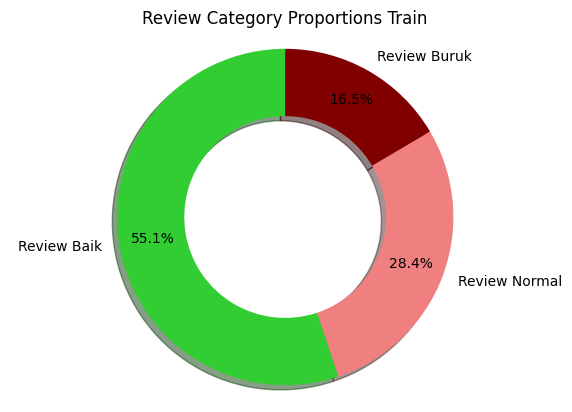

In [65]:
# Create axes
f, ax = plt.subplots(figsize=(6,4))

# plot donut
donut(sizes, ax, 90, labels, colors=colors,  shadow=True)
ax.set_title('Review Category Proportions Train')

plt.show()

In [66]:
df_test['Label (1,0,-1)'].value_counts()

 1    4647
 0    2375
-1    1324
Name: Label (1,0,-1), dtype: int64

In [67]:
sizes = df_test['Label (1,0,-1)'].value_counts()
labels = ['Review Baik', 'Review Normal', 'Review Buruk']
colors = ['limegreen', 'lightcoral','maroon']

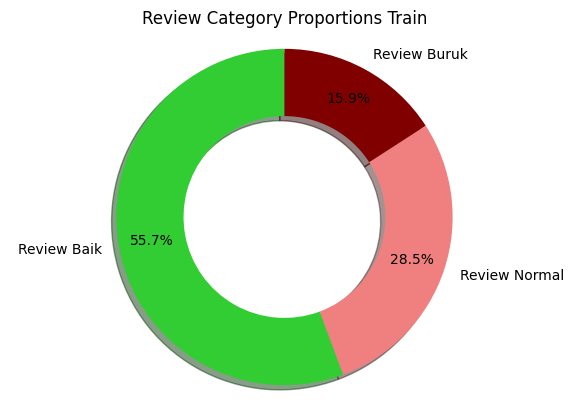

In [68]:
# Create axes
f, ax = plt.subplots(figsize=(6,4))

# plot donut
donut(sizes, ax, 90, labels, colors=colors,  shadow=True)
ax.set_title('Review Category Proportions Train')

plt.show()

### Bank Name

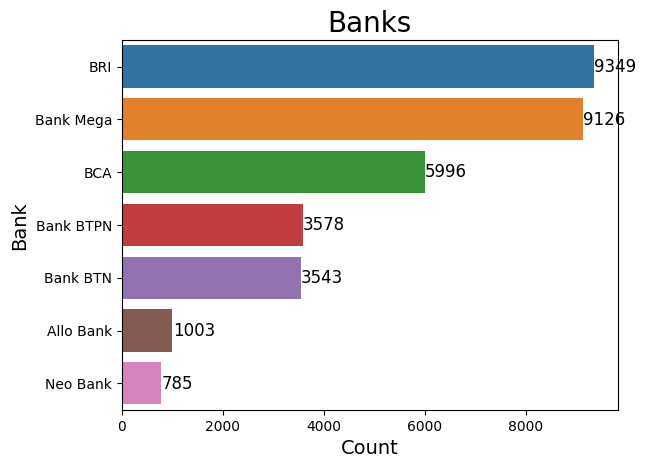

In [69]:
count = [count for count in df_train['bank'].value_counts()]
labels = list(df_train['bank'].value_counts().index)

plt.title('Banks', fontsize = 20)
# plt.figure(figsize=(10, 8))
sns.barplot(x=count, y=labels, data=df_train)

for i, v in enumerate(count):
    plt.text(v + 5, i, str(v), va='center', fontsize=12)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Bank', fontsize=14)
plt.show()

In [70]:
value_counts = df_train['bank'].value_counts()
print(value_counts)

BRI          9349
Bank Mega    9126
BCA          5996
Bank BTPN    3578
Bank BTN     3543
Allo Bank    1003
Neo Bank      785
Name: bank, dtype: int64


# Platform Data

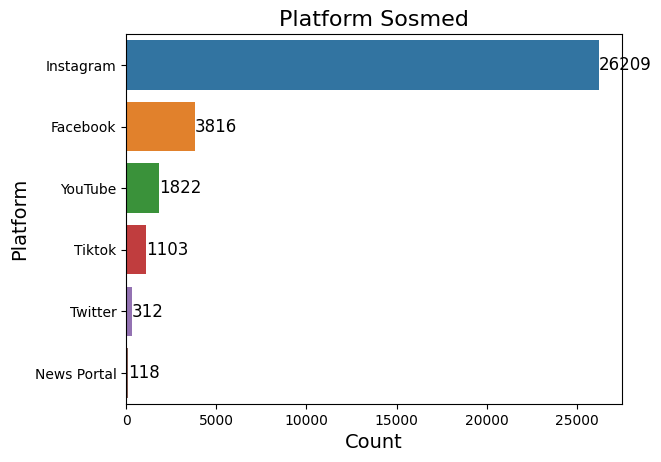

In [71]:
count = [count for count in df_train['platform'].value_counts()]
labels = list(df_train['platform'].value_counts().index)

plt.title('Platform Sosmed', fontsize = 16)
# plt.figure(figsize=(10, 6))
sns.barplot(x=count, y=labels, data=df_train)

for i, v in enumerate(count):
    plt.text(v + 5, i, str(v), va='center', fontsize=12)

plt.title('Platform Sosmed', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.show()

In [72]:
value_counts = df_train['platform'].value_counts()
print(value_counts)

Instagram      26209
Facebook        3816
YouTube         1822
Tiktok          1103
Twitter          312
News Portal      118
Name: platform, dtype: int64


### Review dengan Emoji

In [73]:
sample_emoji1 = df_train.iloc[6]
sample_emoji2 = df_train.iloc[4]

In [74]:
display(sample_emoji1, sample_emoji2)

comments               @dagangkorea 536,340 bca/dana/btpn  -🦊
bank                                                Bank BTPN
platform                                            Instagram
Label (1,0,-1)                                              0
text_cleaned                        536,340 bca/dana/btpn  -🦊
review_text_cleaned                  536,340 bca/dana/btpn -🦊
Name: 4022, dtype: object

comments               Ada banyak diskon 😍
bank                             Bank Mega
platform                         Instagram
Label (1,0,-1)                           1
text_cleaned           Ada banyak diskon 😍
review_text_cleaned    Ada banyak diskon 😍
Name: 7302, dtype: object

In [75]:
demojized1, demojized2 = emoji.demojize(sample_emoji1['review_text_cleaned']), emoji.demojize(sample_emoji2['review_text_cleaned'])
display(demojized1, demojized2)

'536,340 bca/dana/btpn -:fox:'

'Ada banyak diskon :smiling_face_with_heart-eyes:'

### Melihat ulasan dengan emoji

In [76]:
# Function to iterate over all review text (will return text if there is emoji)
def is_emoji(text):
    demojized_txt = emoji.demojize(text)
    res = re.findall(':[a-zA-Z_]+:', demojized_txt)
    if res:
        return text # return original text if emoji is present

# Function to return row indexes of emoji reviews
def emoji_indexes(series):
    filtered = series.map(is_emoji).dropna()
    return list(filtered.index)

In [77]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)
df_train.drop('index', axis=1, inplace=True)
df_test.drop('index', axis=1, inplace=True)

In [78]:
#index review yang memiliki emoji

train_emo = emoji_indexes(df_train['review_text_cleaned'])
test_emo = emoji_indexes(df_test['review_text_cleaned'])
print(len(train_emo),len(df_train))
print(len(test_emo),len(df_test))

8696 33380
2143 8346


Terdapat 8684 data train yang memiliki emoji dari 33847 data </br>
Terdapat 2155 data test yang memiliki emoji dari 8462 data

In [80]:
# Only reviews that contain emoji
train_emo_only = df_train.loc[train_emo]
test_emo_only = df_test.loc[test_emo]

In [81]:
train_emo_only

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned
5,Pagi pagi makan roti mentega\nMinumnya sama su...,Bank Mega,Facebook,1,Pagi pagi makan roti mentega\nMinumnya sama su...,Pagi pagi makan roti mentega Minumnya sama sus...
6,"@dagangkorea 536,340 bca/dana/btpn -🦊",Bank BTPN,Instagram,0,"536,340 bca/dana/btpn -🦊","536,340 bca/dana/btpn -🦊"
8,Jawaban : Ada 4 Kali Logo BRImo Muncul😊 Ayo ik...,BRI,Instagram,1,Jawaban : Ada 4 Kali Logo BRImo Muncul😊 Ayo ik...,Jawaban : Ada 4 Kali Logo BRImo Muncul😊 Ayo ik...
10,Onty @theagnh pleaassee plleeasseee bgt bantui...,BCA,Instagram,1,Onty pleaassee plleeasseee bgt bantuiinn mama...,Onty pleaassee plleeasseee sekali bantuiinn ma...
12,Eka Kurnia rek nyandung weh ah urang mah😁😂😀😀,Bank Mega,Facebook,1,Eka Kurnia rek nyandung weh ah urang mah😁😂😀😀,Eka Kurnia rek nyandung weh ah saya mah😁😂😀😀
...,...,...,...,...,...,...
33367,Negara Pengen Aku junjungi Korea Selatan Biar ...,Bank Mega,Instagram,1,Negara Pengen Aku junjungi Korea Selatan Biar ...,Negara Pengen Aku junjungi Korea Selatan Biar ...
33368,Nunggu cair 😁😁,Bank Mega,Facebook,1,Nunggu cair 😁😁,Nunggu cair 😁😁
33371,Hallo @bankbri_id @jaringanprima . Jawabannya:...,BRI,Instagram,1,Hallo . Jawabannya: 4 KALI ☑️,Hallo . Jawabannya: 4 KALI ☑️
33376,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,BCA,Instagram,1,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,Baru saja sampai di rumah 2 kartu kredit BCA.....


### Mencari emoji yang unique

In [82]:
def unique_emojis(series):
    emojis = [] # list to store all emojis in series
    demojized = series.map(emoji.demojize)
    for text in demojized:
        emojis.extend(re.findall(':[a-z_]+:', text))

    emojis = set(emojis) # keep uniques
    emojis = [emoji.emojize(emo) for emo in emojis]

    return emojis

In [83]:
train_emo_set = unique_emojis(train_emo_only['review_text_cleaned'])
print(f'Count of unique emojis in train: {len(train_emo_set)}')
train_emo_set

Count of unique emojis in train: 437


['💃🏻',
 '👄',
 '😨',
 '🤲',
 '☹️',
 '👼',
 '🤰',
 '🤭',
 '💸',
 '🍻',
 '💕',
 '😺',
 '🏝️',
 '👍',
 '😪',
 '🚐',
 '😿',
 '🌝',
 '🚨',
 '😙',
 '😧',
 '🙂',
 '😃',
 '💟',
 '❤️',
 '🎵',
 '🎂',
 '🎐',
 '👩🏻\u200d❤️\u200d💋\u200d👨🏻',
 '🙍\u200d♀️',
 '🟧',
 '🌸',
 '🤦\u200d♂️',
 '🧕',
 '🤦🏿',
 '📱',
 '👣',
 '🌼',
 '🙏',
 '🍁',
 '👻',
 '🌲',
 '🖕🏻',
 '🙇',
 '👏',
 '📃',
 '☘️',
 '⚫',
 '🤎',
 '➖',
 '🐸',
 '⬆️',
 '🔸',
 '🤸',
 '✨',
 '⚠️',
 '😀',
 '🤧',
 '🥔',
 '😊',
 '💘',
 '😩',
 '💞',
 '🤝',
 '⚙️',
 '⏬',
 '☺️',
 '🟪',
 '🚗',
 '✏️',
 '💠',
 '🥺',
 '🟦',
 '🧐',
 '🧚🏻\u200d♀️',
 '😝',
 '🧊',
 '😅',
 '🧧',
 '🤘🏻',
 '🥝',
 '😵\u200d💫',
 '🤳',
 '💌',
 '🔂',
 '😘',
 '😇',
 '🍕',
 '➡️',
 '🚃',
 '🤮',
 '🤣',
 '🌹',
 '🤡',
 '👨\u200d👩\u200d👧\u200d👦',
 '✍️',
 '💰',
 '🍀',
 '🪐',
 '🛳️',
 '🤍',
 '👑',
 '🌺',
 '✈️',
 '❇️',
 '😕',
 '👊',
 '🖼️',
 '☀️',
 '🍊',
 '💃',
 '👐',
 '🤥',
 '🤓',
 '💆\u200d♂️',
 '🐱',
 '🔊',
 '🙌',
 '❤️\u200d🔥',
 '🎤',
 '🐷',
 '👍🏽',
 '✊',
 '🌵',
 '📹',
 '🐝',
 '🐛',
 '🧾',
 '🖤',
 '🤦',
 '✋🏻',
 '😲',
 '🟩',
 '😐',
 '👇🏻',
 '\U0001fa76',
 '💝',
 '❤️\u200d🩹',
 '🤙🏻',
 '🐻',
 '😗',
 '🤏🏻',
 '🤏',
 '🎶',
 

In [84]:
test_emo_set = unique_emojis(test_emo_only['review_text_cleaned'])
print(f'Count of unique emojis in test: {len(test_emo_set)}')
test_emo_set

Count of unique emojis in test: 247


['😕',
 '🏆',
 '✈️',
 '▪️',
 '🌺',
 '👏🏽',
 '☀️',
 '😨',
 '🤲',
 '💃',
 '🤓',
 '🦹',
 '🔊',
 '🐱',
 '🙌',
 '😾',
 '😹',
 '🚩',
 '☹️',
 '🫂',
 '🎉',
 '❤️\u200d🔥',
 '🎖️',
 '🤭',
 '🎤',
 '💸',
 '😰',
 '🏵️',
 '💕',
 '💼',
 '✊',
 '👍',
 '😪',
 '◻️',
 '💨',
 '💀',
 '‼️',
 '🎟️',
 '🖤',
 '😙',
 '👋',
 '💪',
 '🌿',
 '🤌',
 '🤦',
 '🎯',
 '🤦🏻\u200d♀️',
 '🙂',
 '😃',
 '😐',
 '💟',
 '\U0001fab8',
 '❗',
 '❤️',
 '💝',
 '👩\u200d🦰',
 '🤨',
 '🎂',
 '🐻',
 '😄',
 '🌻',
 '👏🏻',
 '😗',
 '🤏🏻',
 '🤷🏻\u200d♂️',
 '🤯',
 '👈',
 '💅',
 '🙍\u200d♀️',
 '🛍️',
 '🥴',
 '🤲🏻',
 '\U0001fae2',
 '🌸',
 '😓',
 '💖',
 '\U0001fae3',
 '🤬',
 '📦',
 '🧃',
 '💯',
 '☑️',
 '🍃',
 '📱',
 '😭',
 '🎁',
 '💁🏻\u200d♀️',
 '😮\u200d💨',
 '🤦🏻',
 '\U0001f979',
 '🤫',
 '🤦🏻\u200d♂️',
 '🔨',
 '🤗',
 '😬',
 '🙏',
 '😉',
 '💵',
 '🌼',
 '🌟',
 '\U0001fa77',
 '\U0001fae8',
 '👻',
 '🖐🏻',
 '💐',
 '👍🏻',
 '🙋🏻\u200d♀️',
 '♥️',
 '🏦',
 '💓',
 '🙇',
 '😜',
 '😌',
 '👏',
 '👉🏻',
 '😎',
 '⭐',
 '😋',
 '😽',
 '☘️',
 '🥂',
 '🙄',
 '😚',
 '☕',
 '💔',
 '➖',
 '😁',
 '🌴',
 '👜',
 '😡',
 '💳',
 '😞',
 '🤸',
 '✨',
 '⚠️',
 '🥰',
 '🔹',
 '❣️',
 '🪦',
 '😀',
 '👩',
 

In [85]:
# melihat apakah semua emoji train muncul dalam test
print([_ for emo in test_emo_set if emo in train_emo_set])
len([_ for emo in test_emo_set if emo in train_emo_set])

[['😕', '🏆', '✈️', '▪️', '🌺', '👏🏽', '☀️', '😨', '🤲', '💃', '🤓', '🦹', '🔊', '🐱', '🙌', '😾', '😹', '🚩', '☹️', '🫂', '🎉', '❤️\u200d🔥', '🎖️', '🤭', '🎤', '💸', '😰', '🏵️', '💕', '💼', '✊', '👍', '😪', '◻️', '💨', '💀', '‼️', '🎟️', '🖤', '😙', '👋', '💪', '🌿', '🤌', '🤦', '🎯', '🤦🏻\u200d♀️', '🙂', '😃', '😐', '💟', '\U0001fab8', '❗', '❤️', '💝', '👩\u200d🦰', '🤨', '🎂', '🐻', '😄', '🌻', '👏🏻', '😗', '🤏🏻', '🤷🏻\u200d♂️', '🤯', '👈', '💅', '🙍\u200d♀️', '🛍️', '🥴', '🤲🏻', '\U0001fae2', '🌸', '😓', '💖', '\U0001fae3', '🤬', '📦', '🧃', '💯', '☑️', '🍃', '📱', '😭', '🎁', '💁🏻\u200d♀️', '😮\u200d💨', '🤦🏻', '\U0001f979', '🤫', '🤦🏻\u200d♂️', '🔨', '🤗', '😬', '🙏', '😉', '💵', '🌼', '🌟', '\U0001fa77', '\U0001fae8', '👻', '🖐🏻', '💐', '👍🏻', '🙋🏻\u200d♀️', '♥️', '🏦', '💓', '🙇', '😜', '😌', '👏', '👉🏻', '😎', '⭐', '😋', '😽', '☘️', '🥂', '🙄', '😚', '☕', '💔', '➖', '😁', '🌴', '👜', '😡', '💳', '😞', '🤸', '✨', '⚠️', '🥰', '🔹', '❣️', '🪦', '😀', '👩', '\U0001fa75', '🤧', '😊', '✝️', '🤦\u200d♀️', '🤦🏽\u200d♂️', '💘', '🚀', '📣', '😩', '💜', '🔥', '✔️', '💞', '💗', '⚙️', '🧸', '🎫', '☺️', '👉', '\U0001faf

219

Terdapat 241 - 209 = 32 emoji yang terdapat pada test namun tidak ada dalam train

### Proporsi Ulasan Dengan Emoji & Distribusi Label Emoji Pada Train

In [86]:

df_train['emoji'] = df_train['review_text_cleaned'].map(lambda x:'has emoji' if is_emoji(x) else 'no emoji')
df_train

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji
0,"Menurut Haru, sesuai mandat dari Menteri BUMN,...",Bank BTN,Instagram,0,"Menurut Haru, sesuai mandat dari Menteri BUMN,...","Menurut Haru, sesuai mandat dari Menteri BUMN,...",no emoji
1,Kembangkan Bisnis Keluarga dengan BritAma Bisi...,BRI,Instagram,1,Kembangkan Bisnis Keluarga dengan BritAma Bisi...,Kembangkan Bisnis Keluarga dengan BritAma Bisinis,no emoji
2,@pepeishaam @JeniusConnect Untung saya udah ga...,Bank BTPN,Instagram,-1,Untung saya udah ganti ke tmrw respon cs cep...,Untung saya sudah ganti ke tmrw respon layanan...,no emoji
3,"Ada 5 buku tabungan,yuk follow @bankbri_id dan...",BRI,Instagram,1,"Ada 5 buku tabungan,yuk follow dan ikutan kui...","Ada 5 buku tabungan,yuk follow dan ikutan kuis...",no emoji
4,Ada banyak diskon 😍,Bank Mega,Instagram,1,Ada banyak diskon 😍,Ada banyak diskon 😍,no emoji
...,...,...,...,...,...,...,...
33375,1. bersyukur\n2. membereskan hutang2 dulu\n3. ...,Bank Mega,Facebook,1,1. bersyukur\n2. membereskan hutang2 dulu\n3. ...,1. bersyukur 2. membereskan hutang2 dulu 3. be...,no emoji
33376,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,BCA,Instagram,1,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,Baru saja sampai di rumah 2 kartu kredit BCA.....,has emoji
33377,@flip_id Daftar bank transfer untuk Bank BTN d...,Bank BTN,Instagram,0,Daftar bank transfer untuk Bank BTN donk adai...,Daftar bank transfer untuk Bank BTN dong adain...,no emoji
33378,Asyafa Khalisa Putri sapolah itu🤣,Bank Mega,Facebook,0,Asyafa Khalisa Putri sapolah itu🤣,Asyafa Khalisa Putri sapolah itu🤣,has emoji


In [87]:
# jml data yang memiliki emoji dan tidak
tr_has_emoji_counts = df_train['emoji'].value_counts()
tr_has_emoji_counts

no emoji     24684
has emoji     8696
Name: emoji, dtype: int64

In [88]:
# distribusi label yang memiliki emoji
tr_emoji_label = df_train['Label (1,0,-1)'][df_train['emoji']=='has emoji'].value_counts()
tr_emoji_label

 1    6038
 0    1612
-1    1046
Name: Label (1,0,-1), dtype: int64

Terdapat 6065 Data Train yang bersentimen positif </br>
Terdapat 1589 Data Train yang bersentimen netral </br>
Terdapat 1030 Data Train yang bersentimen negatif

### Proporsi Ulasan Dengan Emoji & Distribusi Label Emoji Pada Test

In [89]:
df_test['emoji'] = df_test['review_text_cleaned'].map(lambda x:'has emoji' if is_emoji(x) else 'no emoji')
df_test

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji
0,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌 #BRIm...,BRI,Instagram,1,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,has emoji
1,@sudrajaddwntr @alibyulian @neidijrssyh @dhemm...,BCA,Instagram,1,.j siap siap war tiket pasang reminders dr ...,.j siap siap war tiket pasang reminders dari s...,has emoji
2,Lancar dan lancar semoga bukan cerita lagi,BCA,YouTube,1,Lancar dan lancar semoga bukan cerita lagi,Lancar dan lancar semoga bukan cerita lagi,no emoji
3,Bismillaaaaah,BCA,Instagram,1,Bismillaaaaah,Bismillaaaaah,no emoji
4,@JeniusConnect Paypal bisa gak?,Bank BTPN,Instagram,0,Paypal bisa gak?,Paypal bisa gak?,no emoji
...,...,...,...,...,...,...,...
8341,@JeniusConnect @jeniushelp Unlinknya dipercepa...,Bank BTPN,Instagram,0,Unlinknya dipercepat dong,Unlinknya dipercepat dong,no emoji
8342,Kalo bca prioritas dpt fasilitas apa nih😁,BCA,Instagram,1,Kalo bca prioritas dpt fasilitas apa nih😁,Kalo bca prioritas dapat fasilitas apa nih😁,has emoji
8343,GILA SIHHH AYAANG AKUUU😍😍,Allo Bank,Instagram,1,GILA SIHHH AYAANG AKUUU😍😍,GILA SIHHH AYAANG AKUUU😍😍,no emoji
8344,SEMANGATTTTTT!!!!,Bank Mega,Twitter,1,SEMANGATTTTTT!!!!,SEMANGATTTTTT!!!!,no emoji


In [90]:
# jml data yang memiliki emoji dan tidak
ts_has_emoji_counts = df_test['emoji'].value_counts()
ts_has_emoji_counts

no emoji     6203
has emoji    2143
Name: emoji, dtype: int64

In [91]:
# distribusi label yang memiliki emoji
ts_emoji_label = df_test['Label (1,0,-1)'][df_test['emoji']=='has emoji'].value_counts()
ts_emoji_label

 1    1514
 0     377
-1     252
Name: Label (1,0,-1), dtype: int64

Terdapat 1487 Data Test yang bersentimen positif </br>
Terdapat 400 Data Test yang bersentimen netral </br>
Terdapat 268 Data Test yang bersentimen negatif

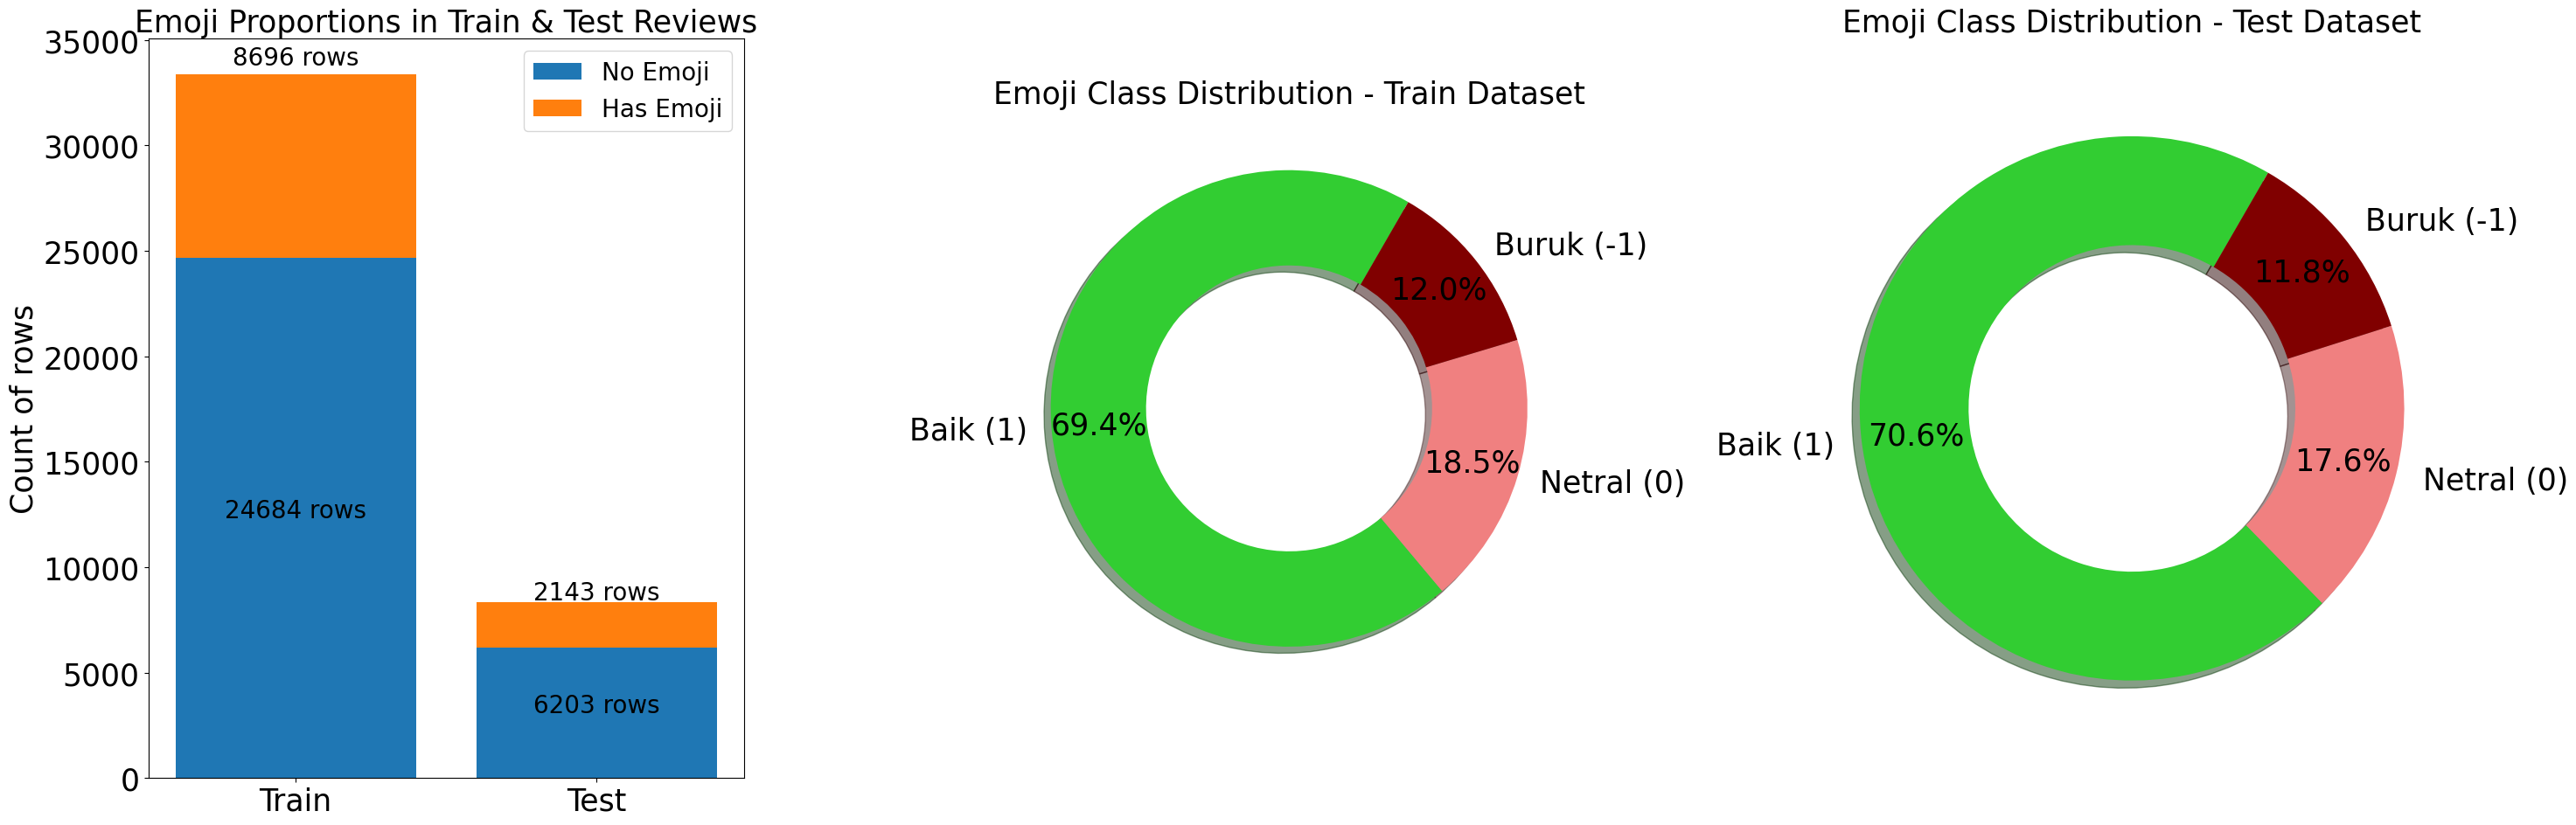

In [92]:
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['font.size'] = 25

# Create axes
f, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))

# Data to be visualized
no_emo = [tr_has_emoji_counts.values[0], ts_has_emoji_counts.values[0]]
has_emo = [tr_has_emoji_counts.values[1], ts_has_emoji_counts.values[1]]
ix = [0,1]
lab = ['Train', 'Test']

# Stacked bar
ax.bar(lab, no_emo, width=0.8, label='No Emoji') # no emo
ax.bar(lab, has_emo, width=0.8, label='Has Emoji', bottom=no_emo) # has emo
ax.set_title('Emoji Proportions in Train & Test Reviews', fontsize=25)
ax.set_ylabel('Count of rows', fontsize=25)
ax.legend(prop={'size':20})

# Text on bar
for i,p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height} rows', (x+width/2, height/2 if i<=1 else y+height*1.05), ha='center', fontsize=20)

# Donut chart train
sizes_tr, labels_tr = tr_emoji_label.values, ['Baik (1)', 'Netral (0)', 'Buruk (-1)']
donut(sizes_tr,ax2,60,labels_tr, colors=colors, explode=None, shadow=True)
ax2.set_title('Emoji Class Distribution - Train Dataset')

# Donut chart test
sizes_ts, labels_ts = ts_emoji_label.values, ['Baik (1)', 'Netral (0)', 'Buruk (-1)']
donut(sizes_ts,ax3,60,labels_ts, colors=colors, explode=None, shadow=True)
ax3.set_title('Emoji Class Distribution - Test Dataset')

# Show plot
plt.tight_layout()
plt.show()

# Membuat Corpus

In [93]:
#hanya mengambil text dan buat jadi huruf kecil
def clean_string(text):
    cleaned = re.sub('[^a-zA-Z]+',' ',text).lower()
    return cleaned

In [94]:
def make_corpus(column):
    # Stopwords
    corpus_list = []
    additional_stop = ['yg', 'nya']
    all_stopwords = stopwords.words('indonesian') + additional_stop

    for text in column:
        cleaned = clean_string(text)
        cleaned_list = cleaned.split(' ')

        # Stem words to shortest form
        stemindo = StemmerFactory().create_stemmer()
        stemmed_list = map(stemindo.stem, cleaned_list)

        # Remove stopwords
        stemmed_list = [word for word in cleaned_list if word not in all_stopwords]
        corpus_list.extend(stemmed_list)

    # transform list of words into 1 body of text
    corpus = ' '.join(corpus_list)
    corpus = re.sub('[ ]+',' ',corpus) # replace double whitespace with one

    return corpus

In [95]:
train_corpus = make_corpus(df_train['review_text_cleaned'])
test_corpus = make_corpus(df_test['review_text_cleaned'])

In [96]:
train_corpus_set = set(train_corpus.split(' '))
test_corpus_set = set(test_corpus.split(' '))

print(f'Count of unique words in train: {len(train_corpus_set)}')
print(f'Count of unique words in test: {len(test_corpus_set)}')

Count of unique words in train: 26430
Count of unique words in test: 11612


Terdapat 26461 kata unik dalam Data Train dan 11526 pada data Test

### Mencari kata yang paling sering

In [97]:
nltk.download('punkt') # for freqdist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
# function for freqdist
def word_freq(corpus, top=5):
    tokenized_word = word_tokenize(corpus)
    freqdist = FreqDist(tokenized_word)
    freqdist = freqdist.most_common(top) # list of tuples

    # decompose into label and frequency
    label = [tup[0] for tup in freqdist]
    freq = [tup[1] for tup in freqdist]
    df = pd.DataFrame({'word':label, 'freq':freq})

    return df

In [99]:
train_freq = word_freq(train_corpus, top=10)
test_freq = word_freq(test_corpus, top=10)

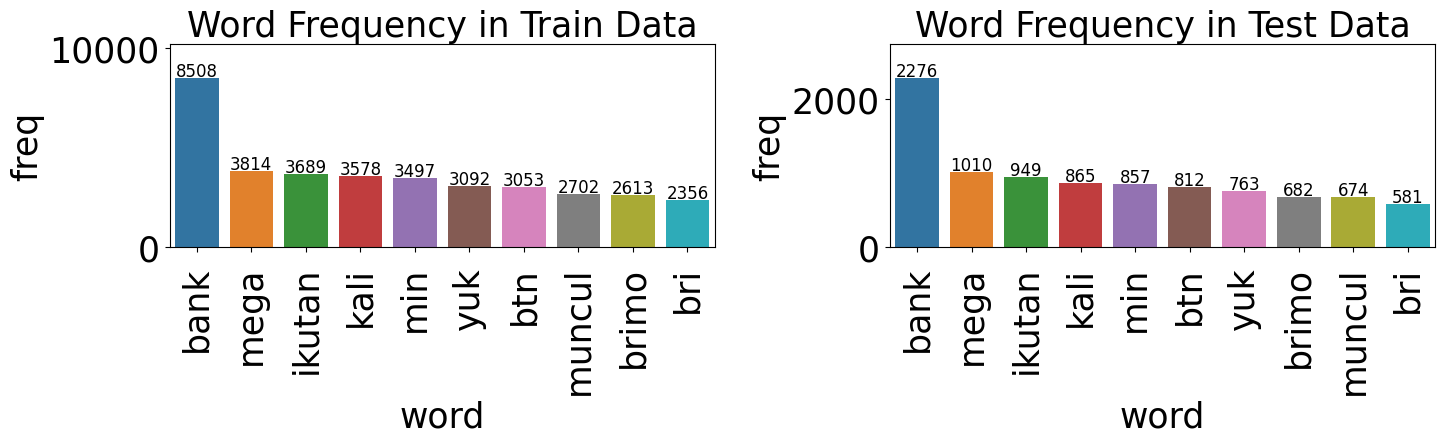

In [100]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='word', y='freq', data=train_freq, ax=ax1)
ax1.set_title('Word Frequency in Train Data')

sns.barplot(x='word', y='freq', data=test_freq, ax=ax2)
ax2.set_title('Word Frequency in Test Data')

# Function to add value labels on top of the bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Add value labels to both axes
add_value_labels(ax1)
add_value_labels(ax2)

# Increase margin among the tiles
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.tick_params(axis='x', pad=10)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.tick_params(axis='x', pad=10)

# Adjust the spacing between the bars
ax1.set(ylim=(0, max(train_freq['freq']) * 1.2))
ax2.set(ylim=(0, max(test_freq['freq']) * 1.2))

# Show the plot
plt.tight_layout()
plt.show()

In [101]:
# Stopwords
additional_stop = ['nya','yg','ga','gk','tp','nih','noh','lah','dong','pa','yuk','gak','ya','sih','yaa','aja', 'min', 'bca','brimo','biar','kak','blu','mega','allo','bank','bca','btn']
all_stopwords = stopwords.words('indonesian') + additional_stop

In [102]:
import matplotlib.font_manager as fm
true_type_fonts = [f.fname for f in fm.fontManager.ttflist if os.path.splitext(f.fname)[1].lower() == ".ttf"]
print(true_type_fonts)

['/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSer

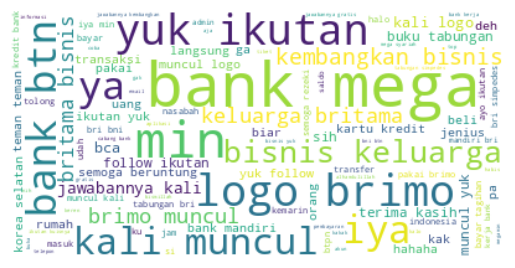

In [103]:
# Cloud for train corpus
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(train_corpus)  # stopwords=all_stopwords,
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

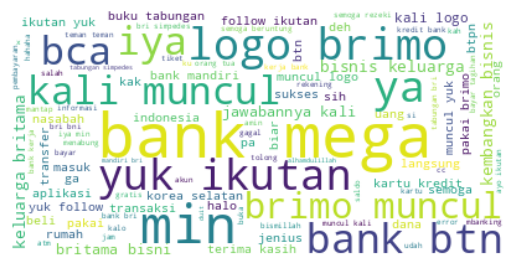

In [104]:
# Cloud for test corpus
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(test_corpus) # stopwords=all_stopwords,
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Data Preprocessing

In [105]:

# 1. Memberi kurung pada emoji
def add_brackets_to_emoji(text):
    emojified_text = emoji.emojize(text)
    modified_text = ""
    for char in emojified_text:
        if emoji.is_emoji(char):
            modified_text += " [" + char + "] "
        else:
            modified_text += char
    return modified_text


# 2. Full clean
def full_clean(text):
    text = add_brackets_to_emoji(text)
    # print(text)
    # demojize first
    text = emoji.demojize(text,delimiters=("", ""))

    # lower text
    cleaned = re.sub('[^a-zA-Z0-9\[\]]+',' ',text).lower()

    # remove 2 letter words
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    cleaned = re.sub(shortword, '', cleaned)

    # double whitespace to single
    cleaned = re.sub('[ ]+',' ',cleaned)

    return cleaned


In [106]:
# find abnormal rows (full_clean function)
df_train['Data'] = df_train['review_text_cleaned'].map(full_clean)
df_train

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji,Data
0,"Menurut Haru, sesuai mandat dari Menteri BUMN,...",Bank BTN,Instagram,0,"Menurut Haru, sesuai mandat dari Menteri BUMN,...","Menurut Haru, sesuai mandat dari Menteri BUMN,...",no emoji,menurut haru sesuai mandat dari menteri bumn b...
1,Kembangkan Bisnis Keluarga dengan BritAma Bisi...,BRI,Instagram,1,Kembangkan Bisnis Keluarga dengan BritAma Bisi...,Kembangkan Bisnis Keluarga dengan BritAma Bisinis,no emoji,kembangkan bisnis keluarga dengan britama bisinis
2,@pepeishaam @JeniusConnect Untung saya udah ga...,Bank BTPN,Instagram,-1,Untung saya udah ganti ke tmrw respon cs cep...,Untung saya sudah ganti ke tmrw respon layanan...,no emoji,untung saya sudah ganti tmrw respon layanan pe...
3,"Ada 5 buku tabungan,yuk follow @bankbri_id dan...",BRI,Instagram,1,"Ada 5 buku tabungan,yuk follow dan ikutan kui...","Ada 5 buku tabungan,yuk follow dan ikutan kuis...",no emoji,ada buku tabungan yuk follow dan ikutan kuisny...
4,Ada banyak diskon 😍,Bank Mega,Instagram,1,Ada banyak diskon 😍,Ada banyak diskon 😍,no emoji,ada banyak diskon [smiling face with heart eyes]
...,...,...,...,...,...,...,...,...
33375,1. bersyukur\n2. membereskan hutang2 dulu\n3. ...,Bank Mega,Facebook,1,1. bersyukur\n2. membereskan hutang2 dulu\n3. ...,1. bersyukur 2. membereskan hutang2 dulu 3. be...,no emoji,bersyukur membereskan hutang2 dulu bersedekah...
33376,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,BCA,Instagram,1,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,Baru saja sampai di rumah 2 kartu kredit BCA.....,has emoji,baru saja sampai rumah kartu kredit bca apakah...
33377,@flip_id Daftar bank transfer untuk Bank BTN d...,Bank BTN,Instagram,0,Daftar bank transfer untuk Bank BTN donk adai...,Daftar bank transfer untuk Bank BTN dong adain...,no emoji,daftar bank transfer untuk bank btn dong adain...
33378,Asyafa Khalisa Putri sapolah itu🤣,Bank Mega,Facebook,0,Asyafa Khalisa Putri sapolah itu🤣,Asyafa Khalisa Putri sapolah itu🤣,has emoji,asyafa khalisa putri sapolah itu [rolling the ...


In [107]:
df_test['Data'] = df_test['review_text_cleaned'].map(full_clean)
df_test

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji,Data
0,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌 #BRIm...,BRI,Instagram,1,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,Jawabannya : 4 LOGO BRIMO Yang Muncul 😍🙌,has emoji,jawabannya logo brimo yang muncul [smiling fac...
1,@sudrajaddwntr @alibyulian @neidijrssyh @dhemm...,BCA,Instagram,1,.j siap siap war tiket pasang reminders dr ...,.j siap siap war tiket pasang reminders dari s...,has emoji,siap siap war tiket pasang reminders dari sek...
2,Lancar dan lancar semoga bukan cerita lagi,BCA,YouTube,1,Lancar dan lancar semoga bukan cerita lagi,Lancar dan lancar semoga bukan cerita lagi,no emoji,lancar dan lancar semoga bukan cerita lagi
3,Bismillaaaaah,BCA,Instagram,1,Bismillaaaaah,Bismillaaaaah,no emoji,bismillaaaaah
4,@JeniusConnect Paypal bisa gak?,Bank BTPN,Instagram,0,Paypal bisa gak?,Paypal bisa gak?,no emoji,paypal bisa gak
...,...,...,...,...,...,...,...,...
8341,@JeniusConnect @jeniushelp Unlinknya dipercepa...,Bank BTPN,Instagram,0,Unlinknya dipercepat dong,Unlinknya dipercepat dong,no emoji,unlinknya dipercepat dong
8342,Kalo bca prioritas dpt fasilitas apa nih😁,BCA,Instagram,1,Kalo bca prioritas dpt fasilitas apa nih😁,Kalo bca prioritas dapat fasilitas apa nih😁,has emoji,kalo bca prioritas dapat fasilitas apa nih [be...
8343,GILA SIHHH AYAANG AKUUU😍😍,Allo Bank,Instagram,1,GILA SIHHH AYAANG AKUUU😍😍,GILA SIHHH AYAANG AKUUU😍😍,no emoji,gila sihhh ayaang akuuu [smiling face with hea...
8344,SEMANGATTTTTT!!!!,Bank Mega,Twitter,1,SEMANGATTTTTT!!!!,SEMANGATTTTTT!!!!,no emoji,semangatttttt


In [108]:
# mencari data yang kosong setelah dibersihkan
df_empty_after_cleaned_train = df_train['Data'].loc[(df_train['Data']=='')|(df_train['Data']==' ')].index
len(df_empty_after_cleaned_train)

203

In [109]:
df_train.drop(df_empty_after_cleaned_train,inplace=True)

In [110]:
df_train.reset_index(inplace=True)
df_train.drop('index', axis=1, inplace=True)
df_train

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji,Data
0,"Menurut Haru, sesuai mandat dari Menteri BUMN,...",Bank BTN,Instagram,0,"Menurut Haru, sesuai mandat dari Menteri BUMN,...","Menurut Haru, sesuai mandat dari Menteri BUMN,...",no emoji,menurut haru sesuai mandat dari menteri bumn b...
1,Kembangkan Bisnis Keluarga dengan BritAma Bisi...,BRI,Instagram,1,Kembangkan Bisnis Keluarga dengan BritAma Bisi...,Kembangkan Bisnis Keluarga dengan BritAma Bisinis,no emoji,kembangkan bisnis keluarga dengan britama bisinis
2,@pepeishaam @JeniusConnect Untung saya udah ga...,Bank BTPN,Instagram,-1,Untung saya udah ganti ke tmrw respon cs cep...,Untung saya sudah ganti ke tmrw respon layanan...,no emoji,untung saya sudah ganti tmrw respon layanan pe...
3,"Ada 5 buku tabungan,yuk follow @bankbri_id dan...",BRI,Instagram,1,"Ada 5 buku tabungan,yuk follow dan ikutan kui...","Ada 5 buku tabungan,yuk follow dan ikutan kuis...",no emoji,ada buku tabungan yuk follow dan ikutan kuisny...
4,Ada banyak diskon 😍,Bank Mega,Instagram,1,Ada banyak diskon 😍,Ada banyak diskon 😍,no emoji,ada banyak diskon [smiling face with heart eyes]
...,...,...,...,...,...,...,...,...
33172,1. bersyukur\n2. membereskan hutang2 dulu\n3. ...,Bank Mega,Facebook,1,1. bersyukur\n2. membereskan hutang2 dulu\n3. ...,1. bersyukur 2. membereskan hutang2 dulu 3. be...,no emoji,bersyukur membereskan hutang2 dulu bersedekah...
33173,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,BCA,Instagram,1,Baru aja nyampe dirumah 2 kartu kredit BCA.. a...,Baru saja sampai di rumah 2 kartu kredit BCA.....,has emoji,baru saja sampai rumah kartu kredit bca apakah...
33174,@flip_id Daftar bank transfer untuk Bank BTN d...,Bank BTN,Instagram,0,Daftar bank transfer untuk Bank BTN donk adai...,Daftar bank transfer untuk Bank BTN dong adain...,no emoji,daftar bank transfer untuk bank btn dong adain...
33175,Asyafa Khalisa Putri sapolah itu🤣,Bank Mega,Facebook,0,Asyafa Khalisa Putri sapolah itu🤣,Asyafa Khalisa Putri sapolah itu🤣,has emoji,asyafa khalisa putri sapolah itu [rolling the ...


Setelah data kosong dibersihkan, tersisa 33179 Data Train

### Panjang kata

In [111]:
# Tokenization
df_train['tokenized'] = df_train['Data'].apply(lambda x : x.split())
df_test['tokenized'] = df_test['Data'].apply(lambda x : x.split())

In [ ]:
# Pencarian panjang dari tiap list yang ada pada kolom 'tokenized'
df_train['length_of_review'] = df_train['tokenized'].apply(lambda x : len(x))
df_test['length_of_review'] = df_test['tokenized'].apply(lambda x : len(x))

# Menunjukkan kolom 'review_id' serta 'length_of_review'
print(df_train[['Data','length_of_review']], '\n', df_test[['Data','length_of_review']])

In [113]:
# Metrik untuk rekapitulasi terkait panjang ulasan.
maxtrain = max(df_train['length_of_review'])
avgtrain = sum(df_train['length_of_review'])/len(df_train.index)
mintrain = min(df_train['length_of_review'])
devtrain = np.std(df_train['length_of_review'])
maxtest = max(df_test['length_of_review'])
avgtest = sum(df_test['length_of_review'])/len(df_test.index)
mintest = min(df_test['length_of_review'])
devtest = np.std(df_test['length_of_review'])

print('Rekapitulasi dari panjang ulasan:\n')
print('- Train -')
print('Max = ', maxtrain, '\nMin = ', mintrain, '\nAverage = ', avgtrain,'\nStdDev = ', devtrain)
print('\n- Test -')
print('Max = ', maxtest, '\nMin = ', mintest, '\nAverage = ', avgtest, '\nStdDev = ', devtest)

Rekapitulasi dari panjang ulasan:

- Train -
Max =  822 
Min =  1 
Average =  13.449498146306176 
StdDev =  13.92562847762983

- Test -
Max =  269 
Min =  0 
Average =  13.290079079798707 
StdDev =  12.710950494230845


In [114]:
df_train[df_train['length_of_review']==1]

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji,Data,tokenized,length_of_review
83,Bismillah,Bank Mega,Facebook,1,Bismillah,Bismillah,no emoji,bismillah,[bismillah],1
137,@JeniusConnect Masih.,Bank BTPN,Instagram,1,Masih.,Masih.,no emoji,masih,[masih],1
167,Truth,Bank Mega,Instagram,0,Truth,Truth,no emoji,truth,[truth],1
187,4 kali #BRImoxJaringanPrima @iing_bani_adam @d...,BRI,Instagram,1,4 kali,4 kali,no emoji,kali,[kali],1
191,4 kali #BRImoxJaringanPrima @retnos8 @elitaa19...,BRI,Instagram,1,4 kali,4 kali,no emoji,kali,[kali],1
...,...,...,...,...,...,...,...,...,...,...
33036,4 kali #brimoxjaringanprima @23gsad @bettercal...,BRI,Instagram,1,4 kali,4 kali,no emoji,kali,[kali],1
33045,gangguan?,BCA,Instagram,-1,gangguan?,gangguan?,no emoji,gangguan,[gangguan],1
33064,@zal139 yanggg,BCA,Instagram,0,yanggg,yanggg,no emoji,yanggg,[yanggg],1
33075,Terbaik,BRI,Instagram,1,Terbaik,Terbaik,no emoji,terbaik,[terbaik],1


In [123]:
df_train[df_train['length_of_review']==822]

,comments,bank,platform,"Label (1,0,-1)",text_cleaned,review_text_cleaned,emoji,Data,tokenized,length_of_review
30179,"Jujur gua sebenarnya ga mau komentar, tpi ga e...",Bank Mega,Facebook,0,"Jujur gua sebenarnya ga mau komentar, tpi ga e...","Jujur saya sebenarnya tidak mau komentar, teta...",no emoji,jujur saya sebenarnya tidak mau komentar tetap...,"[jujur, saya, sebenarnya, tidak, mau, komentar...",822


In [116]:
# Menggambarkan Histogram frekuensi dari panjang ulasan.
fig1 = px.histogram(x = df_train['length_of_review'], nbins = 200)
fig2 = px.histogram(x = df_test['length_of_review'], nbins = 200)
fig1.show()
fig2.show()

# Translate Data

In [117]:
# Func to find 'en' in set of words
# @jit(target_backend='cuda')
def find_en(df):
    result = []
    datas = df['Data'].reset_index(drop=True)
    # print(datas)
    # print(len(datas))
    for i in tqdm(range(len(datas))):
        curr_word = ''
        # print(i)
        # print(datas[i])
        for word in re.split(r'\s+(?![^[\]]*\])', datas[i]):
            word = word.strip('[]')
            # print(word)
            if word != '' and word != None:
                if translator.detect(word) != None and translator.detect(word).lang == 'en':
                    curr_word += ' '
                    curr_word += trans_to_id(word)
                else:
                    curr_word += ' '
                    curr_word += word
        result.append(curr_word)
        # print(curr_word)
    df['translated'] = result
    return df

#Google Translate
translator = Translator()
def trans_to_id(text, translator):
    try:
        res = translator.translate(text,src='en',dest='id').text
        return res
    except:
        return ''

Translate masing-masing kata dan save data

In [118]:
df_train_fix = find_en(df_train)
df_train_fix.to_excel("df_train_fix.xlsx",
             sheet_name='df_train')

  1%|▏         | 437/33177 [06:15<7:48:29,  1.16it/s]


KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
files.download('df_train_fix.xlsx')

In [ ]:
df_test_fix = find_en(df_test)
df_test_fix.to_excel("df_test_fix.xlsx",
             sheet_name='df_test')

In [ ]:
files.download('df_test_fix.xlsx')

Setelah dilakukan translate data, data dilabeling ulang secara manual (karena ada data-data dengan label yg tidak sesuai) dan beberapa data dihilangkan. hingga hasil final menjadi fix_fixed.xlsx

## Translate per batch

In [ ]:
df1 = df_pp[:1000]
df1 = find_en(df1)
df1.to_excel("0-999.xlsx",
             sheet_name='0-999')

In [ ]:
df1 = df_pp[:1000]
df1 = find_en(df1)
df1.to_excel("0-999.xlsx",
             sheet_name='0-999')

In [ ]:
df2 = df_pp[1000:1999]
df2 = find_en(df2)
df2.to_excel("1000-1999.xlsx",
             sheet_name='1000-1999')

In [ ]:
df3 = df_pp[2000:3000]
df3 = find_en(df3)
df3.to_excel("2000-2999.xlsx",
             sheet_name='2000-2999')

In [ ]:
df4 = df_pp[3000:3500]
df4 = find_en(df4)
df4.to_excel("3000-3500.xlsx",
             sheet_name='3000-3500')

In [ ]:
df5 = df_pp[3500:4000]
df5 = find_en(df5)
df5.to_excel("3500-4000.xlsx",
             sheet_name='4000-4999')

In [ ]:
df6 = df_pp[4000:4500]
df6 = find_en(df6)
df6.to_excel("4000-4500.xlsx",
             sheet_name='4000-4500')

In [ ]:
df7 = df_pp[4500:5000]
df7 = find_en(df7)
df7.to_excel("4500-5000.xlsx",
             sheet_name='4500-5000')

In [ ]:
df8 = df_pp[5000:5500]
df8 = find_en(df8)
df8.to_excel("5000-5500.xlsx",
             sheet_name='5000-5500')

In [ ]:
df9 = df_pp[5500:6000]
df9 = find_en(df9)
df9.to_excel("5500-6000.xlsx",
             sheet_name='5500-6000')

In [ ]:
df10 = df_pp[6000:6500]
df10 = find_en(df10)
df10.to_excel("6000-6500.xlsx",
             sheet_name='6000-6500')

In [ ]:
df11 = df_pp[6500:7000]
df11 = find_en(df11)
df11.to_excel("6500-7000.xlsx",
             sheet_name='6500-7000')

In [ ]:
df12 = df_pp[7000:7500]
df12 = find_en(df12)
df12.to_excel("7000-7500.xlsx",
             sheet_name='7000-7500')

In [ ]:
df13 = df_pp[7500:8000]
df13 = find_en(df13)
df13.to_excel("7500-8000.xlsx",
             sheet_name='7500-8000')

In [ ]:
df14 = df_pp[8000:8500]
df14 = find_en(df14)
df14.to_excel("8000-8500.xlsx",
             sheet_name='8000-8500')

In [ ]:
df15 = df_pp[8500:9000]
df15 = find_en(df15)
df15.to_excel("8500-9000.xlsx",
             sheet_name='8500-9000')

In [ ]:
df16 = df_pp[9000:9500]
df16 = find_en(df16)
df16.to_excel("9000-9500.xlsx",
             sheet_name='9000-9500')

In [ ]:
df17 = df_pp[9500:10000]
df17 = find_en(df17)
df17.to_excel("9500-10000.xlsx",
             sheet_name='9500-10000')

In [ ]:
df18 = df_pp[10000:10500]
df18 = find_en(df18)
df18.to_excel("10000-10500.xlsx",
             sheet_name='10000-10500')

In [ ]:
df19 = df_pp[10500:11000]
df19 = find_en(df19)
df19.to_excel("10500-11000.xlsx",
             sheet_name='10500-11000')

In [ ]:
df20 = df_pp[11000:11500]
df20 = find_en(df20)
df20.to_excel("11000-11500.xlsx",
             sheet_name='11000-11500')

In [ ]:
df21 = df_pp[11500:12000]
df21 = find_en(df21)
df21.to_excel("11500-12000.xlsx",
             sheet_name='11500-12000')

In [ ]:
df22 = df_pp[12000:12500]
df22 = find_en(df22)
df22.to_excel("12000-12500.xlsx",
             sheet_name='12000-12500')

In [ ]:
df23 = df_pp[12500:13000]
df23 = find_en(df23)
df23.to_excel("12500-13000.xlsx",
             sheet_name='12500-13000')

In [ ]:
df24 = df_pp[13000:13500]
df24 = find_en(df24)
df24.to_excel("13000-13500.xlsx",
             sheet_name='13000-13500')

In [ ]:
df25 = df_pp[13500:14000]
df25 = find_en(df25)
df25.to_excel("13500-14000.xlsx",
             sheet_name='13500-14000')

In [ ]:
df26 = df_pp[14000:14500]
df26 = find_en(df26)
df26.to_excel("14000-14500.xlsx",
             sheet_name='14000-14500')

In [ ]:
df27 = df_pp[14500:15000]
df27 = find_en(df27)
df27.to_excel("14500-15000.xlsx",
             sheet_name='14500-15000')

In [ ]:
df28 = df_pp[15000:15500]
df28 = find_en(df28)
df28.to_excel("15000-15500.xlsx",
             sheet_name='15000-15500')

In [ ]:
df29 = df_pp[15500:16000]
df29 = find_en(df29)
df29.to_excel("15500-16000.xlsx",
             sheet_name='15500-16000')

In [ ]:
df30 = df_pp[16000:16500]
df30 = find_en(df30)
df30.to_excel("16000-16500.xlsx",
             sheet_name='16000-16500')

In [ ]:
df31 = df_pp[16500:17000]
df31 = find_en(df31)
df31.to_excel("16500-17000.xlsx",
             sheet_name='16500-17000')

In [ ]:
df32 = df_pp[17000:17500]
df32 = find_en(df32)
df32.to_excel("17000-17500.xlsx",
             sheet_name='17000-17500')

In [ ]:
df33 = df_pp[17500:18000]
df33 = find_en(df33)
df33.to_excel("17500-18000.xlsx",
             sheet_name='17500-18000')

In [ ]:
df34 = df_pp[18000:18500]
df34 = find_en(df34)
df34.to_excel("18000-18500.xlsx",
             sheet_name='18000-18500')

In [ ]:
df35 = df_pp[18500:19000]
df35 = find_en(df35)
df35.to_excel("18500-19000.xlsx",
             sheet_name='18500-19000')

In [ ]:
df36 = df_pp[19000:19500]
df36 = find_en(df36)
df36.to_excel("19000-19500.xlsx",
             sheet_name='19000-19500')

In [ ]:
df37 = df_pp[19500:20000]
df37 = find_en(df37)
df37.to_excel("19500-20000.xlsx",
             sheet_name='19500-20000')

In [ ]:
df38 = df_pp[20000:20500]
df38 = find_en(df38)
df38.to_excel("20000-20500.xlsx",
             sheet_name='20000-20500')

In [ ]:
df39 = df_pp[20500:21000]
df39 = find_en(df39)
df39.to_excel("20500-21000.xlsx",
             sheet_name='20500-21000')

In [ ]:
df40 = df_pp[21000:21500]
df40 = find_en(df40)
df40.to_excel("21000-21500.xlsx",
             sheet_name='21000-21500')

In [ ]:
df41 = df_pp[21500:22000]
df41 = find_en(df41)
df41.to_excel("21500-22000.xlsx",
             sheet_name='21500-22000')

In [ ]:
df42 = df_pp[22000:22500]
df42 = find_en(df42)
df42.to_excel("22000-22500.xlsx",
             sheet_name='22000-22500')

In [ ]:
df43 = df_pp[22500:23000]
df43 = find_en(df43)
df43.to_excel("22500-23000.xlsx",
             sheet_name='22500-23000')

In [ ]:
df44 = df_pp[23000:23500]
df44 = find_en(df44)
df44.to_excel("23000-23500.xlsx",
             sheet_name='23000-23500')

In [ ]:
df45 = df_pp[23500:24000]
df45 = find_en(df45)
df45.to_excel("23500-24000.xlsx",
             sheet_name='23500-24000')

In [ ]:
df46 = df_pp[24000:24500]
df46 = find_en(df46)
df46.to_excel("24000-24500.xlsx",
             sheet_name='24000-24500')

In [ ]:
df47 = df_pp[24500:25000]
df47 = find_en(df47)
df47.to_excel("24500-25000.xlsx",
             sheet_name='24500-25000')

In [ ]:
df48 = df_pp[25000:25500]
df48 = find_en(df48)
df48.to_excel("25000-25500.xlsx",
             sheet_name='25000-25500')

In [ ]:
df49 = df_pp[25500:26000]
df49 = find_en(df49)
df49.to_excel("25500-26000.xlsx",
             sheet_name='25500-26000')

In [ ]:
df50 = df_pp[26000:26500]
df50 = find_en(df50)
df50.to_excel("26000-26500.xlsx",
             sheet_name='26000-26500')

In [ ]:
df51 = df_pp[26500:27000]
df51 = find_en(df51)
df51.to_excel("26500-27000.xlsx",
             sheet_name='26500-27000')

In [ ]:
df52 = df_pp[27000:27500]
df52 = find_en(df52)
df52.to_excel("27000-27500.xlsx",
             sheet_name='27000-27500')

In [ ]:
df53 = df_pp[27500:28000]
df53 = find_en(df53)
df53.to_excel("27500-28000.xlsx",
             sheet_name='27500-28000')

In [ ]:
df54 = df_pp[28000:28500]
df54 = find_en(df54)
df54.to_excel("28000-28500.xlsx",
             sheet_name='28000-28500')

In [ ]:
df55 = df_pp[28500:29000]
df55 = find_en(df55)
df55.to_excel("28500-29000.xlsx",
             sheet_name='28500-29000')

In [ ]:
df56 = df_pp[29000:29500]
df56 = find_en(df56)
df56.to_excel("29000-29500.xlsx",
             sheet_name='29000-29500')

In [ ]:
df57 = df_pp[29500:30000]
df57 = find_en(df57)
df57.to_excel("29500-30000.xlsx",
             sheet_name='29500-30000')

In [ ]:
df58 = df_pp[30000:30500]
df58 = find_en(df58)
df58.to_excel("30000-30500.xlsx",
             sheet_name='30000-30500')

In [ ]:
df59 = df_pp[30500:31000]
df59 = find_en(df59)
df59.to_excel("30500-31000.xlsx",
             sheet_name='30500-31000')

In [ ]:
df60 = df_pp[31000:31500]
df60 = find_en(df60)
df60.to_excel("31000-31500.xlsx",
             sheet_name='31000-31500')

In [ ]:
df61 = df_pp[31500:32000]
df61 = find_en(df61)
df61.to_excel("31500-32000.xlsx",
             sheet_name='31500-32000')

In [ ]:
df62 = df_pp[32000:32500]
df62 = find_en(df62)
df62.to_excel("32000-32500.xlsx",
             sheet_name='32000-32500')

In [ ]:
df63 = df_pp[32500:33000]
df63 = find_en(df63)
df63.to_excel("32500-33000.xlsx",
             sheet_name='32500-33000')

In [ ]:
df64 = df_pp[33000:33500]
df64 = find_en(df64)
df64.to_excel("33000-33500.xlsx",
             sheet_name='33000-33500')

In [ ]:
df65 = df_pp[33500:34000]
df65 = find_en(df65)
df65.to_excel("33500-34000.xlsx",
             sheet_name='33500-34000')

In [ ]:
df66 = df_pp[34000:34500]
df66 = find_en(df66)
df66.to_excel("34000-34500.xlsx",
             sheet_name='34000-34500')

In [ ]:
df67 = df_pp[34500:35000]
df67 = find_en(df67)
df67.to_excel("34500-35000.xlsx",
             sheet_name='34500-35000')

In [ ]:
df68 = df_pp[35000:35500]
df68 = find_en(df68)
df68.to_excel("35000-35500.xlsx",
             sheet_name='35000-35500')

In [ ]:
df69 = df_pp[35500:36000]
df69 = find_en(df69)
df69.to_excel("35500-36000.xlsx",
             sheet_name='35500-36000')

In [ ]:
df70 = df_pp[36000:]
df70 = find_en(df70)
df70.to_excel("36000-.xlsx",
             sheet_name='36000-')

## Load translated Data

In [ ]:
rdf1 = pd.read_excel('0-999_fixed.xlsx')
rdf2 = pd.read_excel('1000-1999_fixed.xlsx')
rdf3 = pd.read_excel('2000-2999_fixed.xlsx')
rdf4 = pd.read_excel('3000-3500_fixed.xlsx')
rdf5 = pd.read_excel('3500-4000_fixed.xlsx')
rdf6 = pd.read_excel('4000-4500_fixed.xlsx')
rdf7 = pd.read_excel('4500-5000_fixed.xlsx')
rdf8 = pd.read_excel('5000-5500_fixed.xlsx')
rdf9 = pd.read_excel('5500-6000_fixed.xlsx')
rdf10 = pd.read_excel('6000-6500_fixed.xlsx')
rdf11 = pd.read_excel('6500-7000_fixed.xlsx')
rdf12 = pd.read_excel('7000-7500_fixed.xlsx')
rdf13 = pd.read_excel('7500-8000_fixed.xlsx')
rdf14 = pd.read_excel('8000-8500_fixed.xlsx')
rdf15 = pd.read_excel('8500-9000_fixed.xlsx')
rdf16 = pd.read_excel('9000-9500_fixed.xlsx')
rdf17 = pd.read_excel('9500-10000_fixed.xlsx')
rdf18 = pd.read_excel('10000-10500_fixed.xlsx')
rdf19 = pd.read_excel('10500-11000_fixed.xlsx')
rdf20 = pd.read_excel('11000-11500_fixed.xlsx')
rdf21 = pd.read_excel('11500-12000_fixed.xlsx')
rdf22 = pd.read_excel('12000-12500_fixed.xlsx')
rdf23 = pd.read_excel('12500-13000_fixed.xlsx')
rdf24 = pd.read_excel('13000-13500_fixed.xlsx')
rdf25 = pd.read_excel('13500-14000_fixed.xlsx')
rdf26 = pd.read_excel('14000-14500_fixed.xlsx')
rdf27 = pd.read_excel('14500-15000_fixed.xlsx')
rdf28 = pd.read_excel('15000-15500_fixed.xlsx')
rdf29 = pd.read_excel('15500-16000_fixed.xlsx')
rdf30 = pd.read_excel('16000-16500_fixed.xlsx')
rdf31 = pd.read_excel('16500-17000_fixed.xlsx')
rdf32 = pd.read_excel('17000-17500_fixed.xlsx')
rdf33 = pd.read_excel('17500-18000_fixed.xlsx')
rdf34 = pd.read_excel('18000-18500_fixed.xlsx')
rdf35 = pd.read_excel('18500-19000_fixed.xlsx')
rdf36 = pd.read_excel('19000-19500_fixed.xlsx')
rdf37 = pd.read_excel('19500-20000_fixed.xlsx')
rdf38 = pd.read_excel('20000-20500_fixed.xlsx')
rdf39 = pd.read_excel('20500-21000_fixed.xlsx')
rdf40 = pd.read_excel('21000-21500_fixed.xlsx')
rdf41 = pd.read_excel('21500-22000_fixed.xlsx')
rdf42 = pd.read_excel('22000-22500_fixed.xlsx')
rdf43 = pd.read_excel('22500-23000_fixed.xlsx')
rdf44 = pd.read_excel('23000-23500_fixed.xlsx')
rdf45 = pd.read_excel('23500-24000_fixed.xlsx')
rdf46 = pd.read_excel('24000-24500_fixed.xlsx')
rdf47 = pd.read_excel('24500-25000_fixed.xlsx')
rdf48 = pd.read_excel('25000-25500_fixed.xlsx')
rdf49 = pd.read_excel('25500-26000_fixed.xlsx')
rdf50 = pd.read_excel('26000-26500_fixed.xlsx')
rdf51 = pd.read_excel('26500-27000_fixed.xlsx')
rdf52 = pd.read_excel('27000-27500_fixed.xlsx')
rdf53 = pd.read_excel('27500-28000_fixed.xlsx')
rdf54 = pd.read_excel('28000-28500_fixed.xlsx')
rdf55 = pd.read_excel('28500-29000_fixed.xlsx')
rdf56 = pd.read_excel('29000-29500_fixed.xlsx')
rdf57 = pd.read_excel('29500-30000_fixed.xlsx')
rdf58 = pd.read_excel('30000-30500_fixed.xlsx')
rdf59 = pd.read_excel('30500-31000_fixed.xlsx')
rdf60 = pd.read_excel('31000-31500_fixed.xlsx')
rdf61 = pd.read_excel('31500-32000_fixed.xlsx')
rdf62 = pd.read_excel('32000-32500_fixed.xlsx')
rdf63 = pd.read_excel('32500-33000_fixed.xlsx')
rdf64 = pd.read_excel('33000-33500_fixed.xlsx')
rdf65 = pd.read_excel('33500-34000_fixed.xlsx')
rdf66 = pd.read_excel('34000-34500_fixed.xlsx')
rdf67 = pd.read_excel('34500-35000_fixed.xlsx')
rdf68 = pd.read_excel('35000-35500_fixed.xlsx')
rdf69 = pd.read_excel('35500-36000_fixed.xlsx')
rdf70 = pd.read_excel('36000-_fixed.xlsx')

In [ ]:
# Concatenate rows
combined_df = pd.concat([rdf1, rdf2, rdf3, rdf4, rdf5, rdf6, rdf7, rdf8, rdf9, rdf10, rdf11, rdf12, rdf13, rdf14, rdf15, rdf16, rdf17, rdf18, rdf19, rdf20, rdf21, rdf22, rdf23, rdf24, rdf25, rdf26, rdf27, rdf28, rdf29, rdf30, rdf31, rdf32, rdf33, rdf34, rdf35, rdf36, rdf37, rdf38, rdf39, rdf40, rdf41, rdf42, rdf43, rdf44, rdf45, rdf46, rdf47, rdf48, rdf49, rdf50, rdf51, rdf52, rdf53, rdf54, rdf55, rdf56, rdf57, rdf58, rdf59, rdf60, rdf61, rdf62, rdf63, rdf64, rdf65, rdf66, rdf67, rdf68, rdf69, rdf70], axis=0)

# Transpose the resulting DataFrame
# combined_df = combined_df.T

# Reset the index
combined_df = combined_df.reset_index(drop=True)

combined_df = pd.DataFrame(combined_df)
# Print the combined DataFrame
combined_df.drop(['Unnamed: 0'],axis = 1,inplace=True)
combined_df

In [ ]:
combined_df = combined_df.dropna(subset=['translated'])

In [ ]:
combined_df.reset_index(drop=True,inplace=True)

In [ ]:
df_test

In [3]:
import csv

# Your dictionary with data
data_to_append = slang_words_1

# CSV file path
csv_file_path = 'kamus_slang.csv'

# Check if the file exists
file_exists = True
try:
    with open(csv_file_path, 'r') as file:
        pass
except FileNotFoundError:
    file_exists = False

# If the file doesn't exist, create it
with open(csv_file_path, 'a', newline='') as file:
    fieldnames = ['Field', 'Value']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    if not file_exists:
        writer.writeheader()

    # Append the data to the CSV file in the desired format
    for key, value in data_to_append.items():
        writer.writerow({'Field': key, 'Value': value})

print(f"Data appended to {csv_file_path}.")

Data appended to kamus_slang.csv.
